# **Capstone Project**

This notebook is divided by these sections: collect information, merge it, clean it and try to build a well trained model from scratch.

# Data and knowledge sharing 

As we work remotly, we use a Google Colab notebook and a Google drive to share our code and files respectively.

In [ ]:
# for reading google drive docs. In order to use this, you have to write the token in the box.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We load all the libraries that we will use and take a look at the files that each one of us have loaded:

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) // procesamiento de datos
import numpy as np
import matplotlib.pyplot as plt #for plotting // para crear los graficos
#!pip install seaborn
import seaborn as sns
import datetime
from termcolor import colored as cl # text customization
import matplotlib as mpl
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import re #Regex for ETL in SARIMA model

 
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Datos Capstone Project/'):    #To use this path, you have to go to the "shared with me" folder, right click on the "Datos Capstone Project" folder and click on "Add access to my drive".
    for filename in filenames:
        print(os.path.join(dirname, filename))
    break

/content/drive/MyDrive/Datos Capstone Project/multiTimeline.csv
/content/drive/MyDrive/Datos Capstone Project/PassengersbyAirport.csv
/content/drive/MyDrive/Datos Capstone Project/Tasaparo.csv
/content/drive/MyDrive/Datos Capstone Project/Datos_Covid.xlsx
/content/drive/MyDrive/Datos Capstone Project/temperaturas.csv
/content/drive/MyDrive/Datos Capstone Project/Datos_Covid_Semanal.xlsx
/content/drive/MyDrive/Datos Capstone Project/Datos_Covid_Mensual.xlsx
/content/drive/MyDrive/Datos Capstone Project/Barcos.csv
/content/drive/MyDrive/Datos Capstone Project/Aviones.csv
/content/drive/MyDrive/Datos Capstone Project/viajeros zona BCN.xlsx
/content/drive/MyDrive/Datos Capstone Project/BD_Hosteleria.xlsx
/content/drive/MyDrive/Datos Capstone Project/Predictions RF.xlsx
/content/drive/MyDrive/Datos Capstone Project/df.csv
/content/drive/MyDrive/Datos Capstone Project/Dataset.xlsx


# Raw Data

In this section we will upload the files that we have found and (if applicable) do some ELT to transform the data in a friendly and standarized format.

Because we are working remotly and we have tight work schedules, we divided the search of the information in 4 parts (one for everyone of us).

## COVID-19 Data

In [ ]:
# Read COVID data downloaded from the selected database
Covid_Barcelona = pd.read_excel("/content/drive/MyDrive/Datos Capstone Project/Datos_Covid.xlsx")
Covid_Barcelona.head()

NOM  CODI  ... VACUNATS_DOSI_1 VACUNATS_DOSI_2
0  BARCELONA DRETA    70  ...               0               0
1  BARCELONA DRETA    70  ...               0               0
2  BARCELONA DRETA    70  ...               0               0
3  BARCELONA DRETA    70  ...               0               0
4  BARCELONA DRETA    70  ...               0               0

[5 rows x 22 columns]

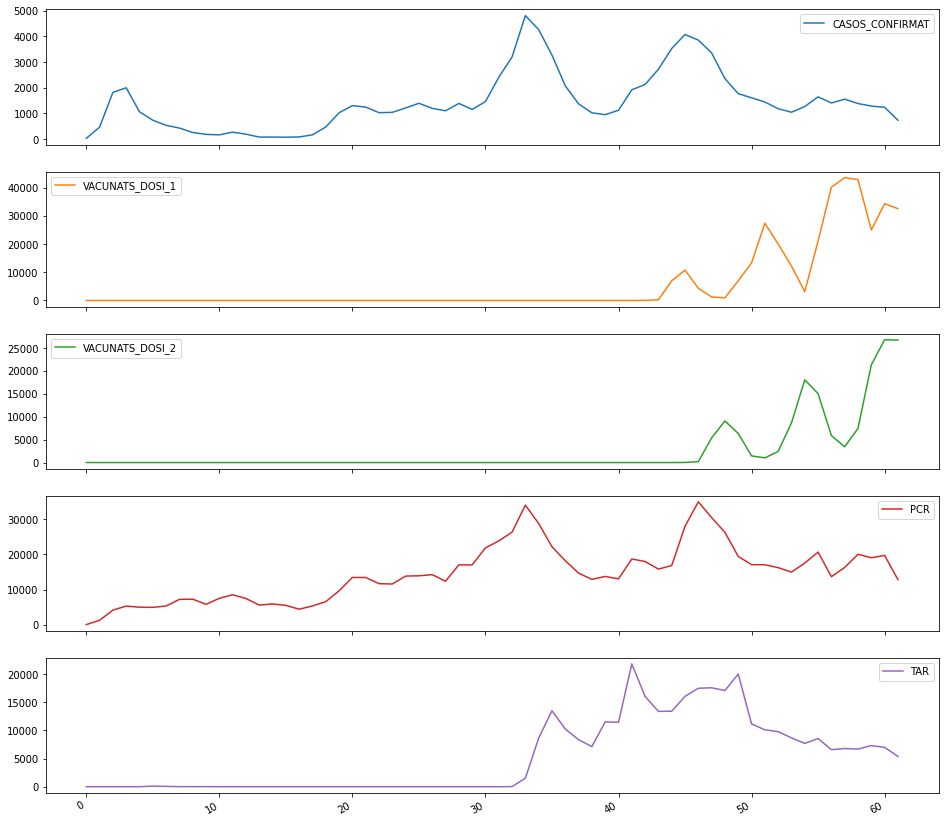

In [ ]:
# Weekly COVID cases in the city of Barcelona without the AIS Barcelona Nord
Covid_Barcelona_Semanal = pd.read_excel("/content/drive/MyDrive/Datos Capstone Project/Datos_Covid_Semanal.xlsx")
Covid_Barcelona_Semanal.head()
Covid_Barcelona_Semanal.plot(subplots=True, figsize=(16, 16)); plt.legend(loc='best')

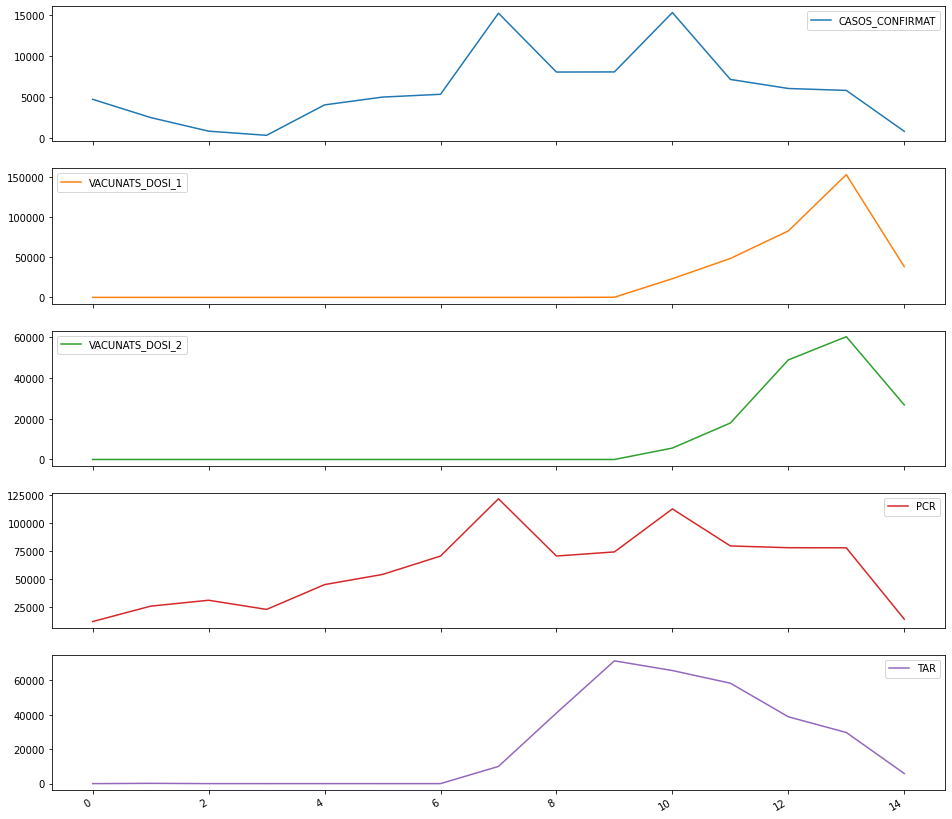

In [ ]:
# Montly COVID cases in the city of Barcelona without the AIS Barcelona Nord
Covid_Barcelona_Mensual = pd.read_excel("/content/drive/MyDrive/Datos Capstone Project/Datos_Covid_Mensual.xlsx")
Covid_Barcelona_Mensual.head()
Covid_Barcelona_Mensual.plot(subplots=True, figsize=(16, 16)); plt.legend(loc='best')

In [ ]:
Covid_Barcelona_Mensual.tail()


DATA  CASOS_CONFIRMAT  VACUNATS_DOSI_1  VACUNATS_DOSI_2     PCR    TAR
10  2021-01            15327            23355             5601  112890  65682
11  2021-02             7169            48624            17895   79874  58330
12  2021-03             6065            83030            48851   78307  38809
13  2021-04             5830           153357            60248   78200  29697
14  2021-05              838            38313            26749   14584   5856

## Travelers Data



In [ ]:
# Read the CSV

BD_viajeros = pd.read_excel('/content/drive/MyDrive/Datos Capstone Project/viajeros zona BCN.xlsx')
BD_viajeros

Mes Total Viajeros Barcelona Viajeros_España Viajeros_Extranjero
0   2021-04                   106692           64802               41890
1   2021-03                   100392           68101               32291
2   2021-02                    83523           60380               23143
3   2021-01                    68844           46557               22287
4   2020-12                    90739           61453               29286
..      ...                      ...             ...                 ...
71  2015-05                   751468          158715              592753
72  2015-04                   688490          132731              555759
73  2015-03                   589585          142938              446647
74  2015-02                   475019          126270              348749
75  2015-01                   430539          125552              304987

[76 rows x 4 columns]

## Tourism Data

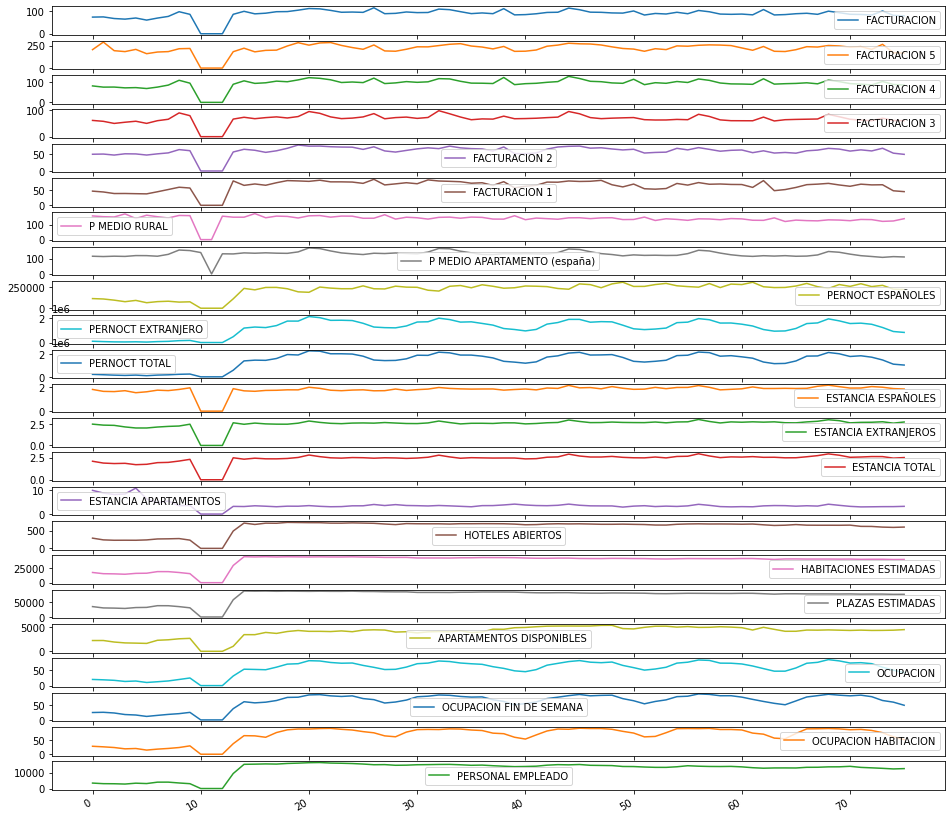

In [ ]:
# Read CSV

BD_Hosteleria = pd.read_excel('/content/drive/MyDrive/Datos Capstone Project/BD_Hosteleria.xlsx')
BD_Hosteleria['Mes']= BD_Hosteleria['PERIODO'].dt.strftime('%Y-%m')
BD_Hosteleria.drop(columns=['PERIODO', 'VIAJEROS ESPAÑA', 'VIAJEROS EXTRANJERO', 'VIAJEROS TOTAL'], inplace=True)
BD_Hosteleria.head()

BD_Hosteleria.plot(subplots=True, figsize=(16, 16)); plt.legend(loc='best')

In [ ]:
# Basic Statistics

BD_Hosteleria.mean()
BD_Hosteleria.min()
BD_Hosteleria.max()

FACTURACION                      113.47
FACTURACION 5                    289.25
FACTURACION 4                    127.43
FACTURACION 3                     98.87
FACTURACION 2                     78.67
FACTURACION 1                      86.1
P MEDIO RURAL                    173.79
P MEDIO APARTAMENTO (españa)     170.34
PERNOCT ESPAÑOLES                307152
PERNOCT EXTRANJERO              2105644
PERNOCT TOTAL                   2293850
ESTANCIA ESPAÑOLES              2.14105
ESTANCIA EXTRANJEROS            3.07354
ESTANCIA TOTAL                  2.92119
ESTANCIA APARTAMENTOS                11
HOTELES ABIERTOS                    737
HABITACIONES ESTIMADAS            44639
PLAZAS ESTIMADAS                  89133
APARTAMENTOS DISPONIBLES           5343
OCUPACION                         85.88
OCUPACION FIN DE SEMANA           86.88
OCUPACION HABITACION              90.01
PERSONAL EMPLEADO                 16327
Mes                             2021-04
dtype: object

## Transportation and others






Number of passengers to El Prat airport:



In [ ]:
PassengersbyAirport = pd.read_csv('/content/drive/MyDrive/Datos Capstone Project/PassengersbyAirport.csv', index_col=False, delimiter = ';')

PassengersbyAirport.head(5)

Mes  Pasajeros en avion
0  2015-01             2182824
1  2015-02             2198817
2  2015-03             2866178
3  2015-04             3305879
4  2015-05             3583111

Number of planes to El Prat airport:

In [ ]:
Aviones = pd.read_csv('/content/drive/MyDrive/Datos Capstone Project/Aviones.csv', index_col=False, delimiter = ';')

Aviones.head(5)

Mes  Aviones
0  2021-04     6095
1  2021-03     5061
2  2021-02     3818
3  2021-01     5341
4  2020-12     6929

Number of passengers ships that arrives to Barcelona's Port

In [ ]:
Barcos = pd.read_csv('/content/drive/MyDrive/Datos Capstone Project/Barcos.csv', index_col=False, delimiter = ';', encoding='latin-1')

# Group by month and type of boat (passengers, etc)

Barcos = Barcos.groupby(['Mes', 'Tipo barco'])['Escalas'].sum().reset_index()

#Get only the passengers boats
Barcos = Barcos[Barcos['Tipo barco'] == 'Passatge'] 

# Convert column type to string
Barcos['Mes'] = Barcos.Mes.astype(str) 

#Function to add "-"
def insert_sting_middle(str, word):
	return str[:4] + word + str[4:]

#Apply function to column
Barcos['Mes'] = Barcos['Mes'].apply(lambda x:  insert_sting_middle(x,'-'))

#Drop column "tipo barco"
Barcos = Barcos.drop(columns=['Tipo barco'])

#Rename column 'Escalas' to Barcos de pasajeros
Barcos.rename(columns={"Escalas":"Barcos de pasajeros"}, inplace = True)

Barcos.head(5)

Mes  Barcos de pasajeros
3   2015-01                   25
12  2015-02                   18
21  2015-03                   26
30  2015-04                   79
39  2015-05                   95

Barcelona's mean temperatures

In [ ]:
Temperatura = pd.read_csv('/content/drive/MyDrive/Datos Capstone Project/temperaturas.csv', index_col=False, delimiter = ',')

#Reshape to long format
Temperatura = Temperatura.melt(id_vars=['Any'], var_name='Mes', value_name='Temperaturas') 

#Use dictionary to transform months into numeric types 
Temperatura.Mes = Temperatura.Mes.replace({"Enero": '01', "Febrero": '02', "Marzo": '03', "Abril": '04',"Mayo": '05', "Junio": '06',"Julio": '07', "Agosto": '08',"Septiembre": '09', "Octubre": '10',"Noviembre": '11', "Diciembre": '12'})

#Concatenate year-month
Temperatura['Mes'] = Temperatura['Any'].map(str)+"-"+Temperatura['Mes'].map(str)

#Drop column any
Temperatura = Temperatura.drop(columns=['Any'])

Temperatura.head(5)

Mes  Temperaturas
0  2015-01           9.1
1  2016-01          10.7
2  2017-01           7.9
3  2018-01          10.5
4  2019-01           8.1

Search index of "hotel barcelona" from google trends

In [ ]:
search = pd.read_csv('/content/drive/MyDrive/Datos Capstone Project/multiTimeline.csv', index_col=0, header = 1)

#Rename the column
search.rename(columns={"hotel barcelona":"Indice busquedas"}, inplace = True) 

search.head(5)

Indice busquedas
Mes                      
2015-01                67
2015-02                75
2015-03                88
2015-04                79
2015-05                86

Evolution of the unemployment rate in spain

In [ ]:
Paro = pd.read_csv('/content/drive/MyDrive/Datos Capstone Project/Tasaparo.csv', index_col=False, delimiter = ';', encoding='latin-1')

#Use dictionary to transform months into numeric types 
Paro.Periodo = Paro.Periodo.replace({"Enero": '01', "Febrero": '02', "Marzo": '03', "Abril": '04',"Mayo": '05', "Junio": '06',"Julio": '07', "Agosto": '08',"Septiembre": '09', "Octubre": '10',"Noviembre": '11', "Diciembre": '12'})

#Concatenate year-month
Paro['Mes'] = Paro['Año'].map(str)+"-"+Paro['Periodo'].map(str)

#Drop column "any"
Paro = Paro.drop(columns=['Año','Periodo'])

Paro

Nº total de parados en España      Mes
0                          2017389  2001-01
1                          1993273  2001-02
2                          1981006  2001-03
3                          1910453  2001-04
4                          1898285  2001-05
..                             ...      ...
239                        3888137  2020-12
240                        3964353  2021-01
241                        4008789  2021-02
242                        3949640  2021-03
243                        3910628  2021-04

[244 rows x 2 columns]

Merge every dataset in a single dataframe

In [ ]:
#First we join the data from planes and google searchs
Dataset_transport = Aviones.merge(search, left_on='Mes', right_on='Mes')

#Merge dataset with temperatures
Dataset_transport = Dataset_transport.merge(Temperatura, left_on='Mes', right_on='Mes')  

#Merge dataset with unemployment rate
Dataset_transport = Dataset_transport.merge(Paro, left_on='Mes', right_on='Mes') 

#Left join because there is not data for several months for passengers boats (when there is any, there is no record for that year-month)
Dataset_transport = Dataset_transport.merge(Barcos,on='Mes',how='left')

#Unify Pasajeros with passengers
Dataset_transport = Dataset_transport.merge(PassengersbyAirport,on='Mes',how='left')

#Because the data was updated after we took the information we add it manualy using data from Aena
Dataset_transport.at[3,'Pasajeros en avion'] = 411486
Dataset_transport.at[2,'Pasajeros en avion'] = 286650
Dataset_transport.at[1,'Pasajeros en avion'] = 423774
Dataset_transport.at[0,'Pasajeros en avion'] = 481682


Dataset_transport.sort_values('Mes',inplace=True) #Sorting
Dataset_transport.reset_index(drop=True, inplace=True)
Dataset_transport.head(5)

Mes  Aviones  ...  Barcos de pasajeros  Pasajeros en avion
0  2015-01    18165  ...                 25.0           2182824.0
1  2015-02    17338  ...                 18.0           2198817.0
2  2015-03    21335  ...                 26.0           2866178.0
3  2015-04    24698  ...                 79.0           3305879.0
4  2015-05    26518  ...                 95.0           3583111.0

[5 rows x 7 columns]

In [ ]:
Dataset_transport.plot(subplots=True, figsize=(16, 16)); plt.legend(loc='best')

# Data Cleaning and merging

Once we gathered all the different datasets, we merge them in one big dataframe and then do some cleaning task.

In [ ]:
# Change column name 

Covid_Barcelona_Mensual.rename(columns={'DATA': 'Mes'}, inplace=True)

In [ ]:
# Merge all datasets

# Unify dataset viajeros and transporte
Dataset=Dataset_transport.merge(BD_viajeros, how='left', on=['Mes'])

# Unify Databasis with COVID data. NaN in dates pior to pandemics are substituted by zero
Dataset=Dataset.merge(Covid_Barcelona_Mensual, how='left', on=['Mes'])

# Unificar dataset con datos de establecimientos
Dataset = Dataset.merge(BD_Hosteleria, left_on='Mes', right_on='Mes')

#Dataset[0:30]
Dataset.rename(columns = {'Mes':'Periodo'}, inplace = True)
Dataset['Mes'] = pd.DatetimeIndex(Dataset['Periodo']).month
Dataset['Año'] = pd.DatetimeIndex(Dataset['Periodo']).year
Dataset.rename(columns = {'Total Viajeros Barcelona' : 'Viajeros_Tot'}, inplace = True)
Dataset.head()

Periodo  Aviones  Indice busquedas  ...  PERSONAL EMPLEADO  Mes   Año
0  2015-01    18165                67  ...              12513    1  2015
1  2015-02    17338                75  ...              12312    2  2015
2  2015-03    21335                88  ...              12686    3  2015
3  2015-04    24698                79  ...              12994    4  2015
4  2015-05    26518                86  ...              13282    5  2015

[5 rows x 40 columns]

In [ ]:
# Check the missing values

sns.set(rc={'figure.figsize':(30,10)})
sns.heatmap(Dataset.isnull())
plt.show()

print(cl(Dataset.isnull().sum(), attrs = ['bold']))

Periodo                           0
Aviones                           0
Indice busquedas                  0
Temperaturas                      0
Nº total de parados en España     0
Barcos de pasajeros               2
Pasajeros en avion                0
Viajeros_Tot                      0
Viajeros_España                   0
Viajeros_Extranjero               0
CASOS_CONFIRMAT                  62
VACUNATS_DOSI_1                  62
VACUNATS_DOSI_2                  62
PCR                              62
TAR                              62
FACTURACION                       0
FACTURACION 5                     0
FACTURACION 4                     0
FACTURACION 3                     0
FACTURACION 2                     0
FACTURACION 1                     0
P MEDIO RURAL                     0
P MEDIO APARTAMENTO (españa)      0
PERNOCT ESPAÑOLES                 0
PERNOCT EXTRANJERO                0
PERNOCT TOTAL                     0
ESTANCIA ESPAÑOLES                0
ESTANCIA EXTRANJEROS        

For the merging process, we handle the missing values of each data set in these ways:

- Travelers Data: we replace the missing values "." for 0 values since there was no tourism for may and june 2020. Barcelona was in a lockdown phase.
- COVID-19 Data: Unify Databasis with COVID-19 data. NaN in dates pior to pandemics are substituted by zero
- Transportation Data: Convert NaN values to 0 because, in the input CSV file all boats are registered, if not, it is because there was no data for that month.

In [ ]:
# replace missing values "." for 0 values since there was no tourism for may and june 2020
Dataset['Viajeros_Tot'].replace('.', 0, inplace=True)
Dataset['Viajeros_España'].replace('.', 0, inplace=True)
Dataset['Viajeros_Extranjero'].replace('.', 0, inplace=True)

In [ ]:
# Unify Databasis with COVID data. NaN in dates pior to pandemics are substituted by zero
Dataset['CASOS_CONFIRMAT']=Dataset['CASOS_CONFIRMAT'].fillna(0)  
Dataset['VACUNATS_DOSI_1']=Dataset['VACUNATS_DOSI_1'].fillna(0)
Dataset['VACUNATS_DOSI_2']=Dataset['VACUNATS_DOSI_2'].fillna(0)
Dataset['PCR']=Dataset['PCR'].fillna(0)
Dataset['TAR']=Dataset['TAR'].fillna(0)

In [ ]:
# Convert NaN values to 0 because, in the input CSV file all boats are registered, if not, it is because there was no data for that month.
Dataset['Barcos de pasajeros'] = Dataset['Barcos de pasajeros'].fillna(0)

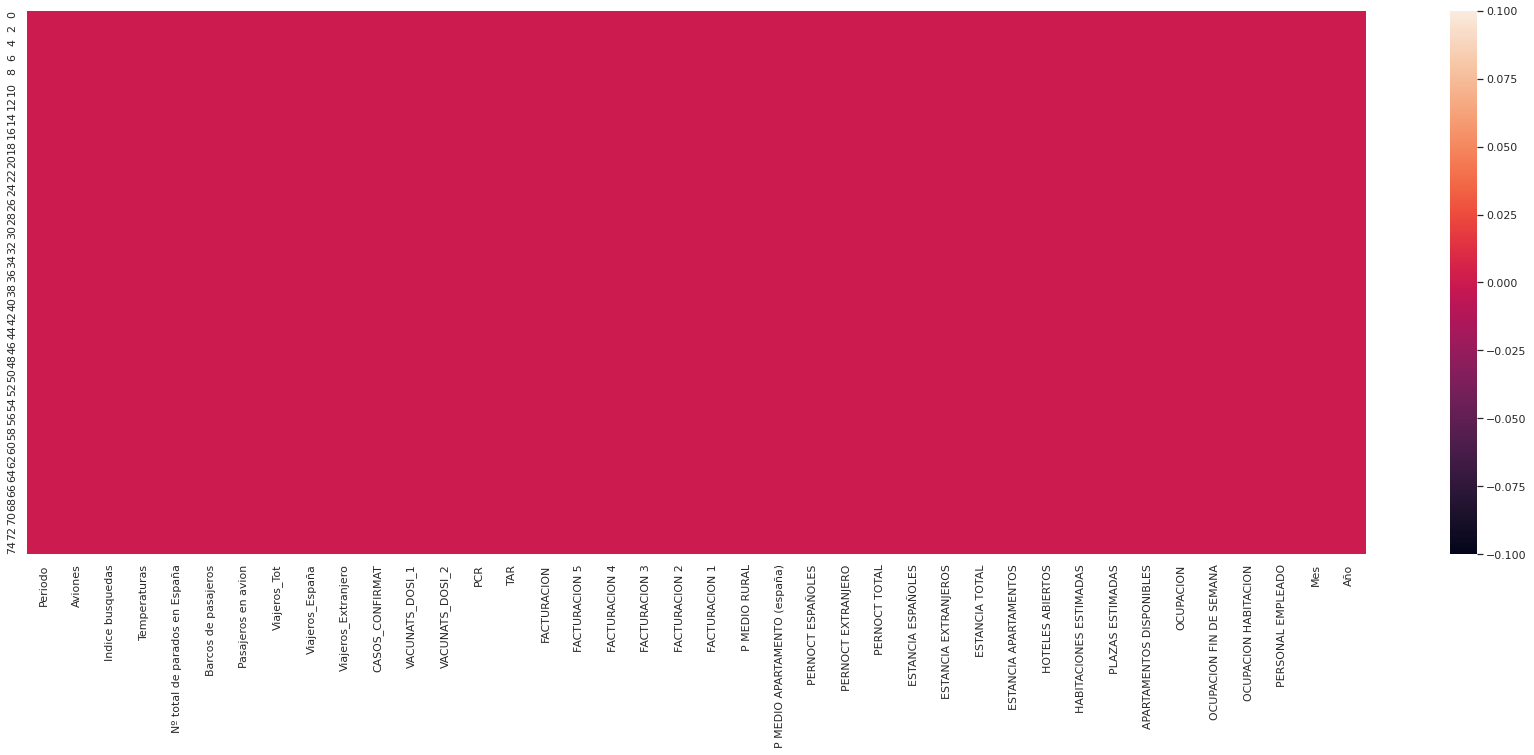

Periodo                          0
Aviones                          0
Indice busquedas                 0
Temperaturas                     0
Nº total de parados en España    0
Barcos de pasajeros              0
Pasajeros en avion               0
Viajeros_Tot                     0
Viajeros_España                  0
Viajeros_Extranjero              0
CASOS_CONFIRMAT                  0
VACUNATS_DOSI_1                  0
VACUNATS_DOSI_2                  0
PCR                              0
TAR                              0
FACTURACION                      0
FACTURACION 5                    0
FACTURACION 4                    0
FACTURACION 3                    0
FACTURACION 2                    0
FACTURACION 1                    0
P MEDIO RURAL                    0
P MEDIO APARTAMENTO (españa)     0
PERNOCT ESPAÑOLES                0
PERNOCT EXTRANJERO               0
PERNOCT TOTAL                    0
ESTANCIA ESPAÑOLES               0
ESTANCIA EXTRANJEROS             0
ESTANCIA TOTAL      

In [ ]:
# Check one more time if there are any missing values

sns.heatmap(Dataset.isnull())
plt.show()

print(cl(Dataset.isnull().sum(), attrs = ['bold']))

In [ ]:
#Check data types
Dataset.dtypes

Periodo                           object
Aviones                            int64
Indice busquedas                   int64
Temperaturas                     float64
Nº total de parados en España      int64
Barcos de pasajeros              float64
Pasajeros en avion               float64
Viajeros_Tot                       int64
Viajeros_España                    int64
Viajeros_Extranjero                int64
CASOS_CONFIRMAT                  float64
VACUNATS_DOSI_1                  float64
VACUNATS_DOSI_2                  float64
PCR                              float64
TAR                              float64
FACTURACION                      float64
FACTURACION 5                    float64
FACTURACION 4                    float64
FACTURACION 3                    float64
FACTURACION 2                    float64
FACTURACION 1                    float64
P MEDIO RURAL                    float64
P MEDIO APARTAMENTO (españa)     float64
PERNOCT ESPAÑOLES                  int64
PERNOCT EXTRANJE

In [ ]:
# Save cleaned dataset in an xlsx file
Dataset.sort_values(by='Periodo', ascending=True, inplace=True)
Dataset.to_excel("/content/drive/MyDrive/Datos Capstone Project/Dataset.xlsx", index=False)
Dataset.head()

Periodo  Aviones  Indice busquedas  ...  PERSONAL EMPLEADO  Mes   Año
0  2015-01    18165                67  ...              12513    1  2015
1  2015-02    17338                75  ...              12312    2  2015
2  2015-03    21335                88  ...              12686    3  2015
3  2015-04    24698                79  ...              12994    4  2015
4  2015-05    26518                86  ...              13282    5  2015

[5 rows x 40 columns]

# Explanatory Analysis

The merging and cleaning process is done. Now it is time to do some explanatory analysis before building our main models.

## What is COVID-19 and why it affects tourism?

https://www.who.int/docs/default-source/coronaviruse/key-messages-and-actions-for-covid-19-prevention-and-control-in-schools-march-2020.pdf?sfvrsn=baf81d52_4

In this section we will look at how the disease has spread in Barcelona and the correlation between the spread, tourism and transportation data.



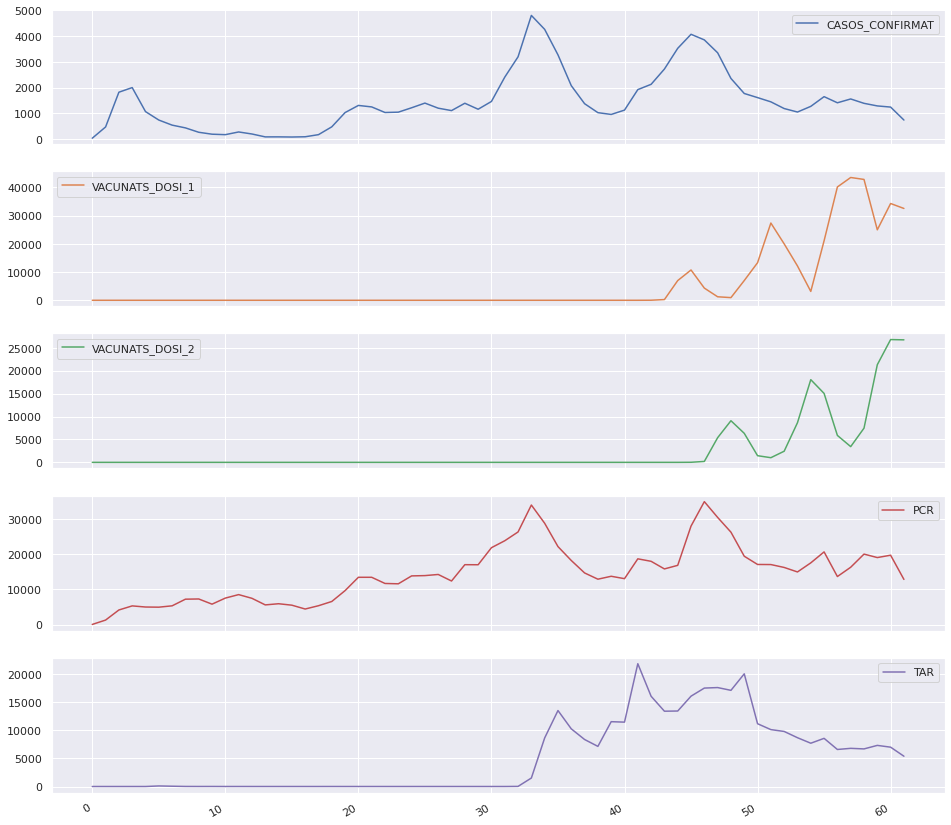

In [ ]:
# Explanatory Analysis for covid19 dataset: weekly analysis
Covid_Barcelona_Semanal.plot(subplots=True, figsize=(16, 16)); plt.legend(loc='best')


## Dependent Variable

Since we are under a forecasting task with time series data, we should expect patterns of seasonality and/or trends, especially for our tourism data.

In [ ]:
# set periodo as index
Dataset_v1=Dataset.set_index('Periodo')
Dataset_v1.index = pd.to_datetime(Dataset_v1.index)

If we ignore the period of the pandemic (2020-2021), there is a clear positive trend and seasonality pattern in our dependent variable "Viajeros_Tot" for 2015 to 2019 years.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


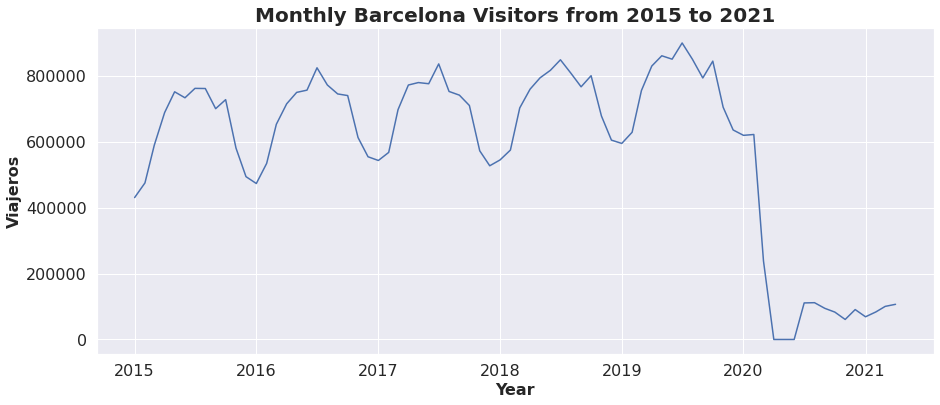

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(Dataset_v1.index, Dataset_v1['Viajeros_Tot'] )

ax.set_title('Monthly Barcelona Visitors from 2015 to 2021', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Viajeros', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
# Define the date format
ax.xaxis_date()
date_form = mdates.DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

In [ ]:
# Select the periods pre covid19 2015-2019
DatasetPRE = Dataset[Dataset['Año'] < 2020]
DatasetPRE.head(10)

Periodo  Aviones  Indice busquedas  ...  PERSONAL EMPLEADO  Mes   Año
0  2015-01    18165                67  ...              12513    1  2015
1  2015-02    17338                75  ...              12312    2  2015
2  2015-03    21335                88  ...              12686    3  2015
3  2015-04    24698                79  ...              12994    4  2015
4  2015-05    26518                86  ...              13282    5  2015
5  2015-06    27404                88  ...              13952    6  2015
6  2015-07    29144               100  ...              13643    7  2015
7  2015-08    29028                89  ...              13611    8  2015
8  2015-09    27021                81  ...              13362    9  2015
9  2015-10    25116                77  ...              13333   10  2015

[10 rows x 40 columns]

It is reasonable to believe that "Viajeros_Tot" has a seasonality pattern because the number of visitors usually increase from spring to summer months. The positive trend might imply that Barcelona becomes more and more popular amongst tourists and, therefore, it receives every year an increase of visitors.

For the main analysis, we will take into account these patterns.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Número Viajeros')

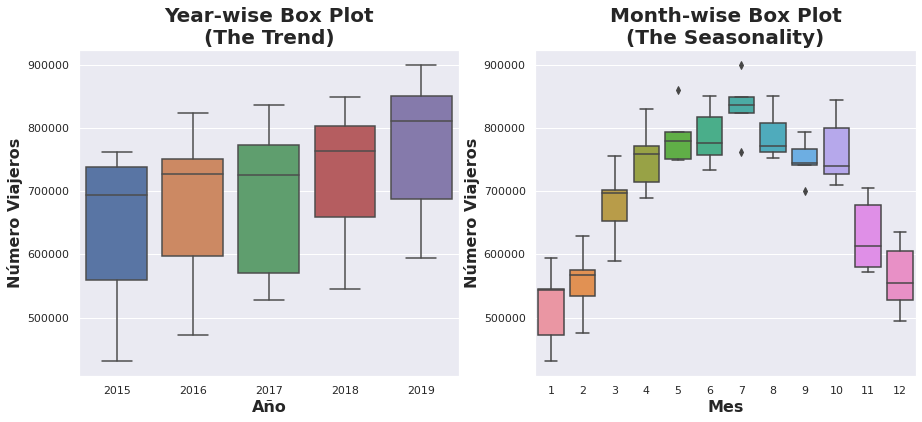

In [ ]:
# Seasonal plot of viajeros time series:
# compare the year wise patterns side-by-side

variable = 'Viajeros_Tot'
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("ch:2.5,-.2,dark=.3", 5)
sns.lineplot(DatasetPRE['Mes'], DatasetPRE[variable], hue=DatasetPRE['Año'], palette=palette)
ax.set_title('Seasonal plot of Viajeros', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Número Viajeros', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(DatasetPRE['Año'], DatasetPRE[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Año', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Número Viajeros', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(DatasetPRE['Mes'], DatasetPRE[variable], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Mes', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Número Viajeros', fontsize = 16, fontdict=dict(weight='bold'))

## Main correlations

We create three different correlation matrices. We believe features do not influence our dependent variable in the same way with the presence of COVID-19 data. 

First, we check the correlation between the variables to see if we should drop some of them

In [ ]:
Dataset = pd.read_excel('/content/drive/MyDrive/Datos Capstone Project/Dataset.xlsx')
Dataset.dtypes

Periodo                           object
Aviones                            int64
Indice busquedas                   int64
Temperaturas                     float64
Nº total de parados en España      int64
Barcos de pasajeros                int64
Pasajeros en avion                 int64
Viajeros_Tot                       int64
Viajeros_España                    int64
Viajeros_Extranjero                int64
CASOS_CONFIRMAT                    int64
VACUNATS_DOSI_1                    int64
VACUNATS_DOSI_2                    int64
PCR                                int64
TAR                                int64
FACTURACION                      float64
FACTURACION 5                    float64
FACTURACION 4                    float64
FACTURACION 3                    float64
FACTURACION 2                    float64
FACTURACION 1                    float64
P MEDIO RURAL                    float64
P MEDIO APARTAMENTO (españa)     float64
PERNOCT ESPAÑOLES                  int64
PERNOCT EXTRANJE

In [ ]:
# Draws correlation matrix in pandemics
corrmat = Dataset[62:74].corr()
# Draw the heatmap using seaborn
plt.figure(figsize=(25, 25))
sns.heatmap(corrmat, vmin=-1, vmax=1, center= 0, square=True, annot=True)


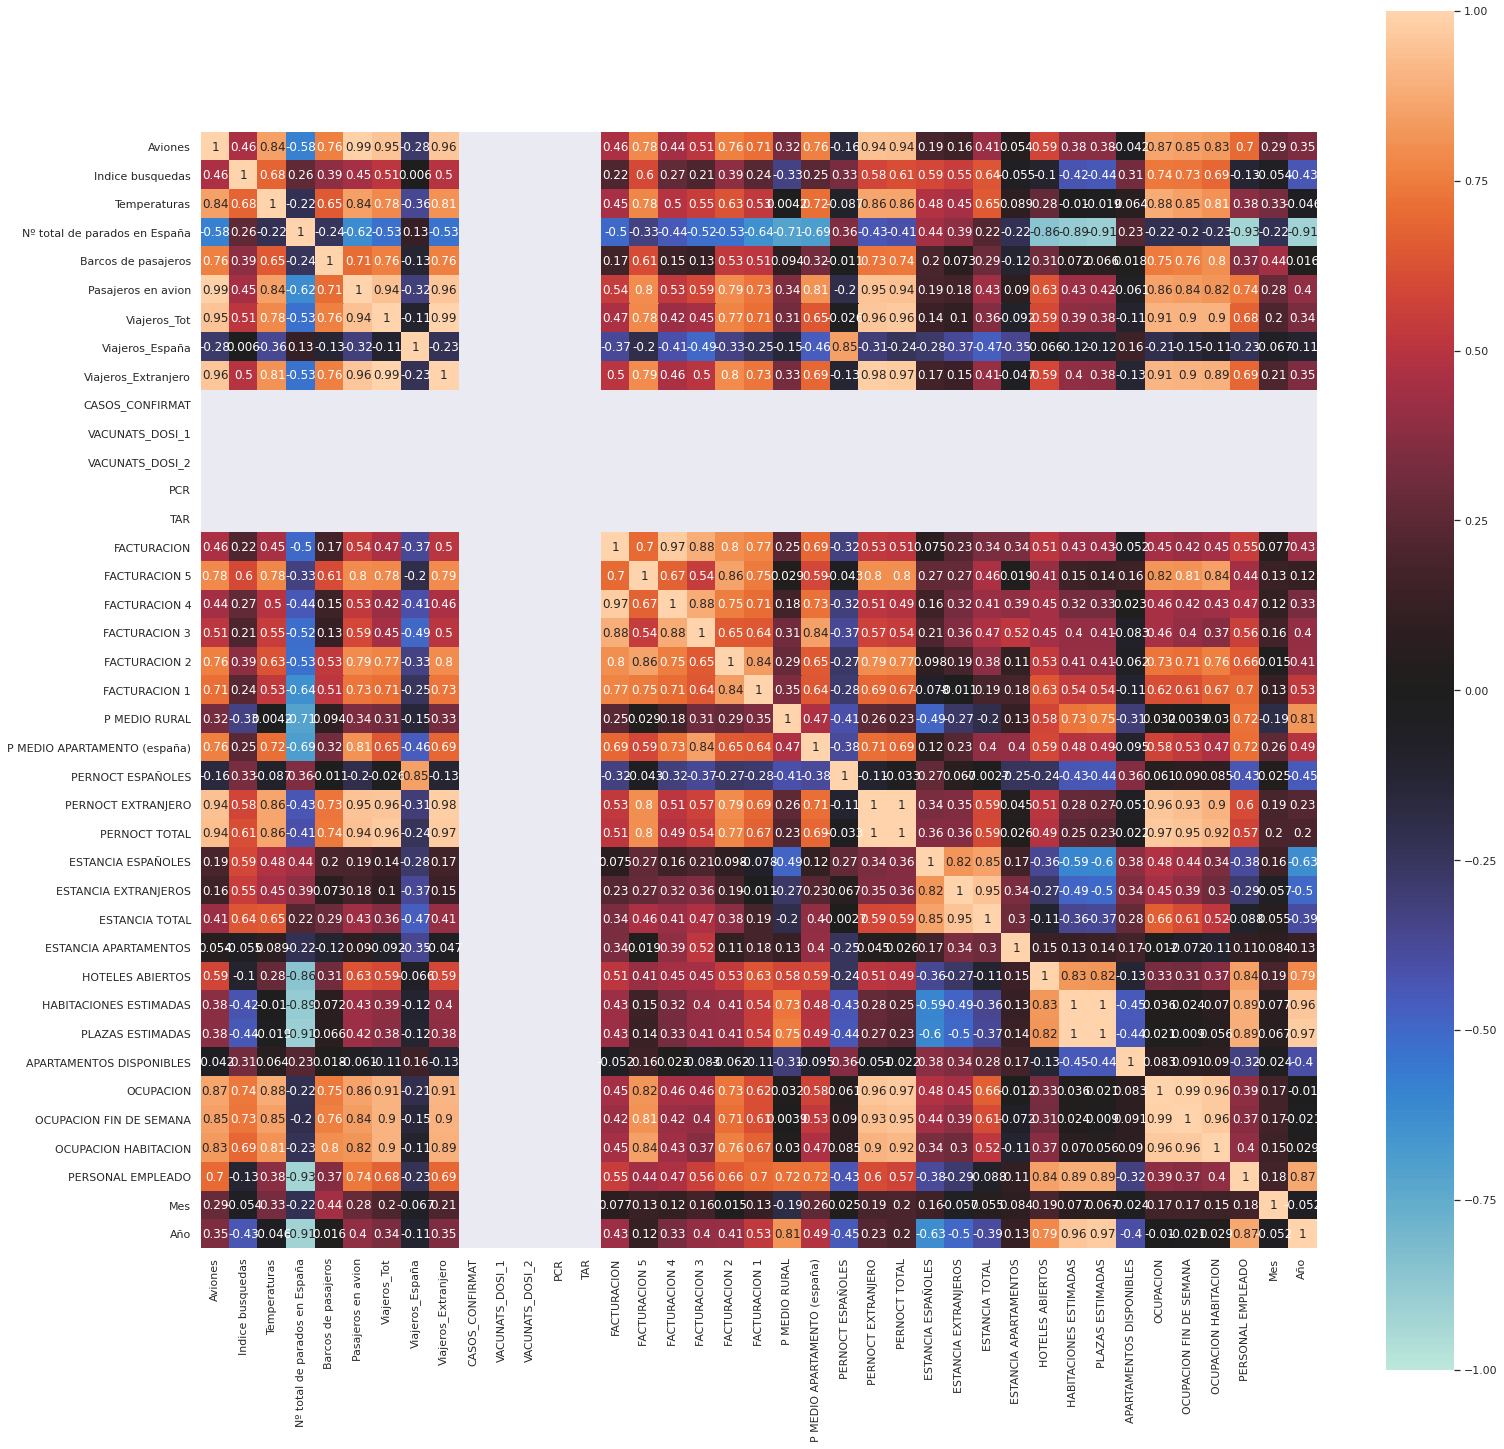

In [ ]:
# Draws correlation matrix before pandemics
corrmat = Dataset[0:61].corr()
# Draw the heatmap using seaborn
plt.figure(figsize=(25, 25))
sns.heatmap(corrmat, vmin=-1, vmax=1, center= 0, square=True, annot=True)

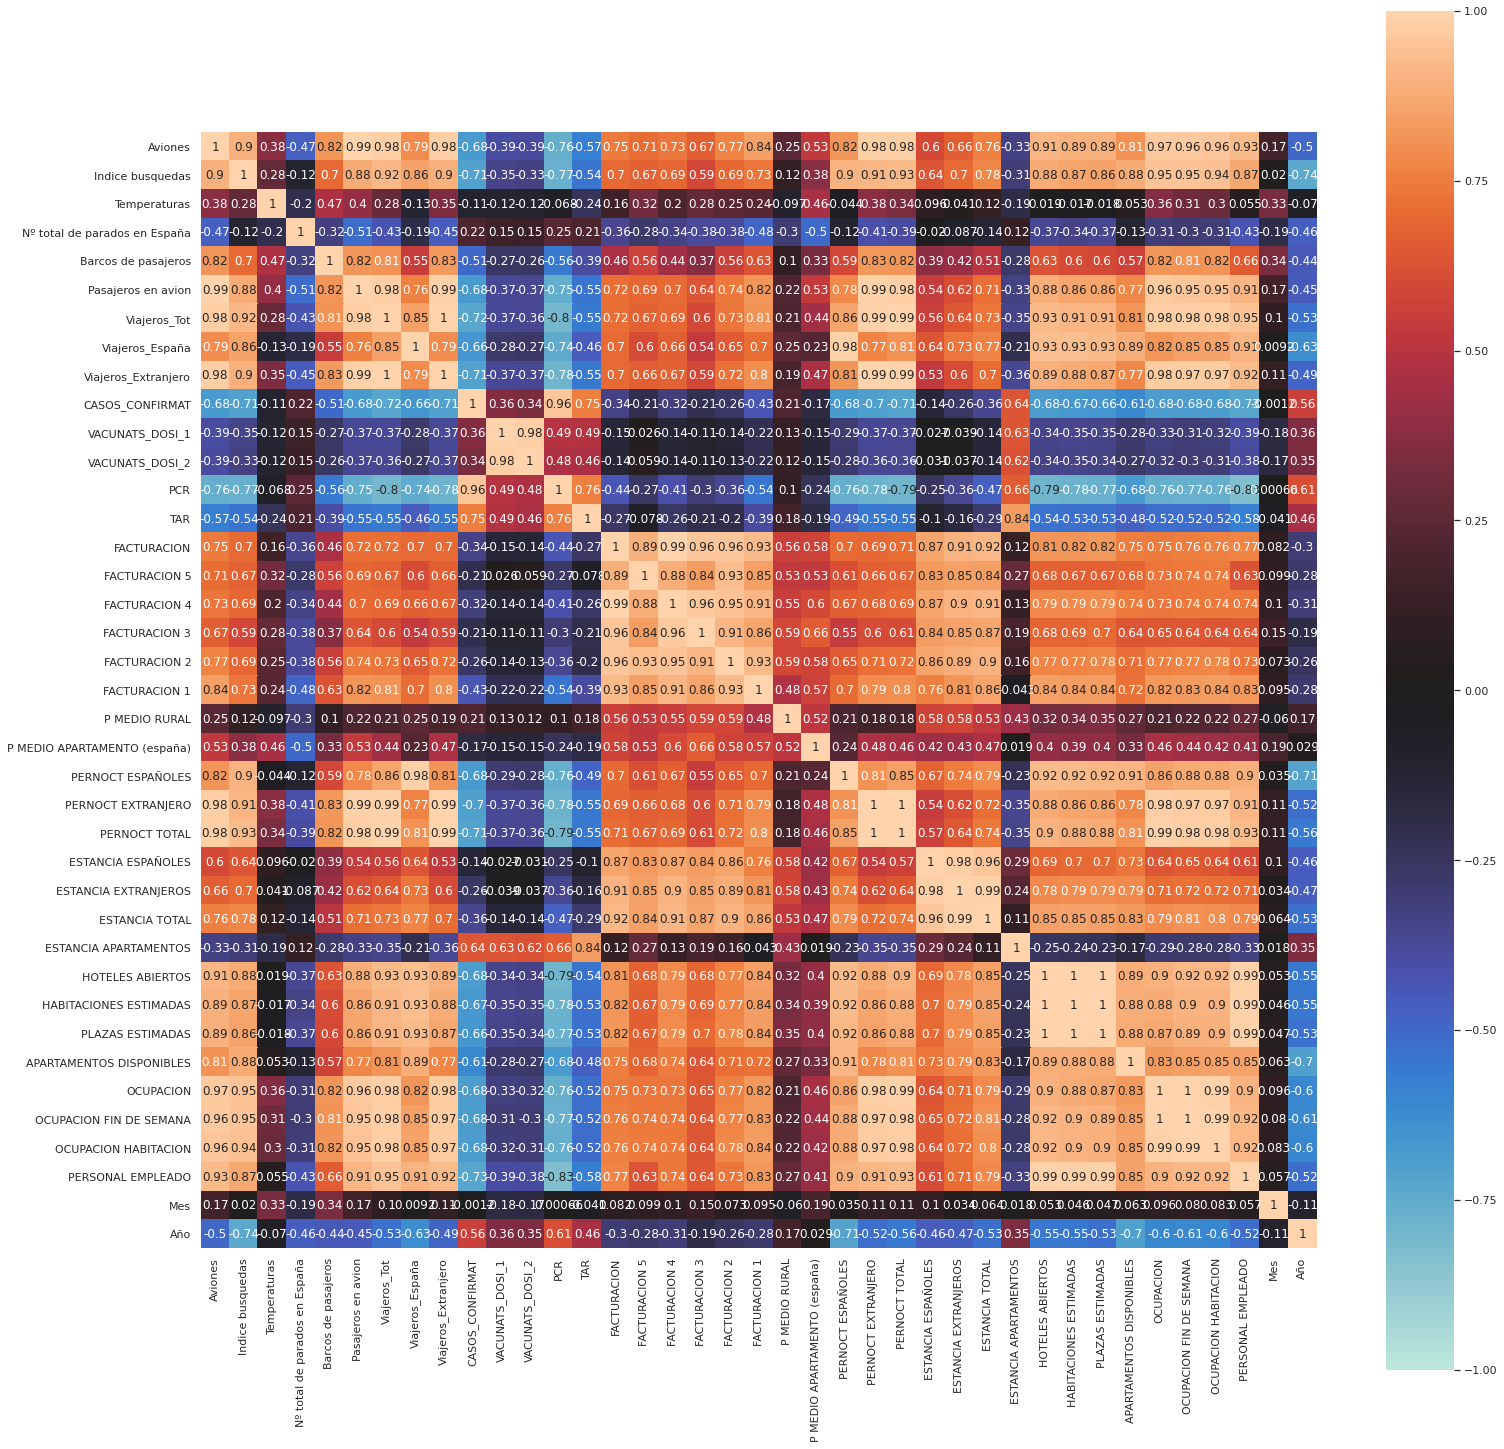

In [ ]:
corrmat = Dataset.corr()
# Draw the heatmap using seaborn
plt.figure(figsize=(25, 25))
sns.heatmap(corrmat, vmin=-1, vmax=1, center= 0, square=True, annot=True)

# Models and scenarios

In this section we build different models with different inputs to understand the behavior of the data, try to fit the data into some models and make a prediction based on the available variables.

## Simple Linear Regression

In [ ]:
# Plot to visualize the seasonality effect in each year for every month
sns.lmplot("Mes", "Viajeros_Tot", DatasetPRE, size=5.2, aspect=2) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


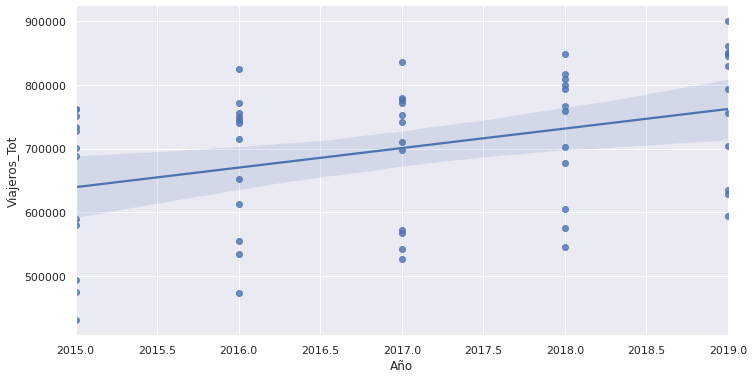

In [ ]:
sns.lmplot("Año", "Viajeros_Tot", DatasetPRE, size=5.2, aspect=2, ) 

In [ ]:
# Seasonal Adjustment group by month
agrupado = DatasetPRE.groupby('Mes')
mes_mean = agrupado["Viajeros_Tot"].mean()
mes_var = agrupado["Viajeros_Tot"].var()
print('Means: {}'.format(mes_mean))
print('Variances: {}'.format(mes_var))


Means: Mes
1     517278.6
2     556033.8
3     679533.2
4     752917.8
5     787047.4
6     786569.4
7     834066.2
8     788875.2
9     749303.6
10    764475.2
11    629745.8
12    563173.8
Name: Viajeros_Tot, dtype: float64
Variances: Mes
1     4.225144e+09
2     3.197342e+09
3     3.850527e+09
4     2.970916e+09
5     2.049904e+09
6     2.211141e+09
7     2.455229e+09
8     1.618846e+09
9     1.182491e+09
10    3.157149e+09
11    3.484126e+09
12    3.288907e+09
Name: Viajeros_Tot, dtype: float64


In [ ]:
# Data normalization
for i in range(12):
    DatasetPRE.Viajeros_Tot[DatasetPRE.Mes==i+1] = 100*(DatasetPRE.Viajeros_Tot[DatasetPRE.Mes==i+1] - mes_mean[i+1])/mes_mean.mean()
    
sns.lmplot("Mes", "Viajeros_Tot", DatasetPRE,size=5.2,aspect=2);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


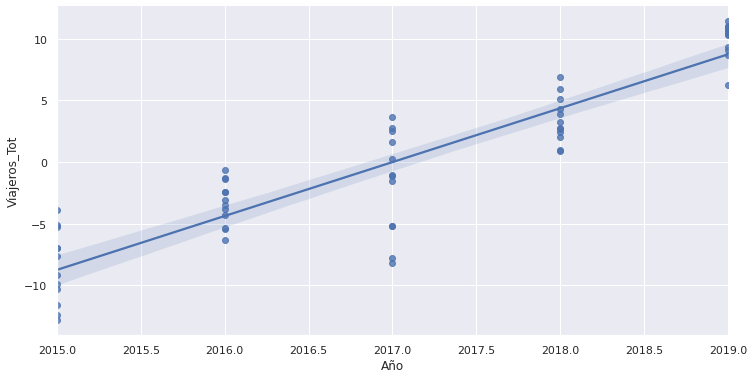

In [ ]:
#Plot anual evolution

sns.lmplot("Año", "Viajeros_Tot", DatasetPRE,size=5.2,aspect=2);

In [ ]:
# Build a simple linear regressione with only one variable
from sklearn.linear_model import LinearRegression

est = LinearRegression()

x = DatasetPRE[['Año']]
y = DatasetPRE[['Viajeros_Tot']]

est.fit(x, y)

print(est.coef_),
print(est.intercept_)

[[4.37076496]]
[-8815.83293297]


MSE: 7.533617333014571
EV: 0.8028219103497174
R^2: 0.8028219103497174


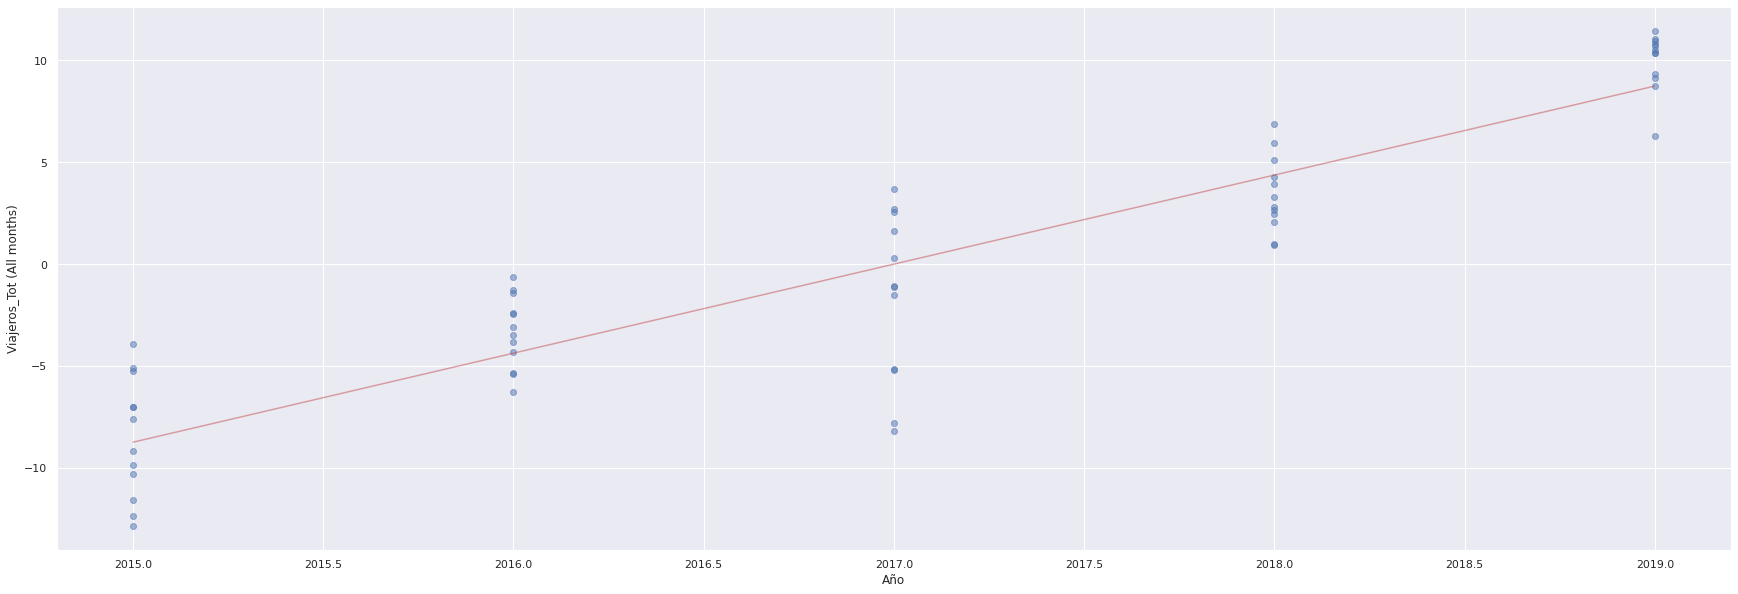

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Analysis for all months together.
x = DatasetPRE[['Año']]
y = DatasetPRE[['Viajeros_Tot']]
model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x)
plt.plot(x, y,'o', alpha=0.5)
plt.plot(x, y_hat, 'r', alpha=0.5)
plt.xlabel('Año')
plt.ylabel('Viajeros_Tot (All months)')
print("MSE: {}".format(metrics.mean_squared_error(y_hat, y)))
print("EV: {}".format(metrics.explained_variance_score(y_hat, y)))
print("R^2: {}".format(metrics.r2_score(model.predict(x), y)))

In [ ]:
#Forecast number of tourists with data without covid19 features
X=np.array([2021])
X = np.expand_dims(X, axis=1)
X.shape
y_hat = model.predict(X)
j=8 # August

# Original value (before normalization)
y_hat=(y_hat*mes_mean.mean()/100)+mes_mean[j]
print("Prediction of number of visitors for August : {}".format(y_hat))

Prediction of number of visitors for August : [[911388.03333333]]


In [ ]:
# Fit a model again using covid period
DatasetPost = Dataset[62:76] 
#Visualize monthly
sns.lmplot("Mes", "Viajeros_Tot", DatasetPost, size=5.2, aspect=2) 
DatasetPost

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Periodo  Aviones  Indice busquedas  ...  PERSONAL EMPLEADO  Mes   Año
62  2020-03    13443                34  ...               9422    3  2020
63  2020-04     1339                13  ...                  0    4  2020
64  2020-05     1516                15  ...                  0    5  2020
65  2020-06     2505                26  ...                  0    6  2020
66  2020-07    10118                36  ...               3040    7  2020
67  2020-08    13872                38  ...               3485    8  2020
68  2020-09    10270                34  ...               4017    9  2020
69  2020-10     8710                28  ...               4003   10  2020
70  2020-11     5153                24  ...               3122   11  2020
71  2020-12     6929                30  ...               3358   12  2020
72  2021-01     5341                26  ...               2811    1  2021
73  2021-02     3818                30  ...               2999    2  2021
74  2021-03     5061                35  ...               3054    3  2021
75  2021-04     6095                31  ...               3422    4  2021

[14 rows x 40 columns]

In [ ]:
# Build a simple linear regressione with only one variable
from sklearn.linear_model import LinearRegression

est = LinearRegression()

x = DatasetPost[['Año']]
y = DatasetPost[['Viajeros_Tot']]

est.fit(x, y)

print(est.coef_),
print(est.intercept_)

[[10911.05]]
[-21961369.29999997]


MSE: 3407386200.3464284
EV: -139.24401881875824
R^2: -139.2440188187582


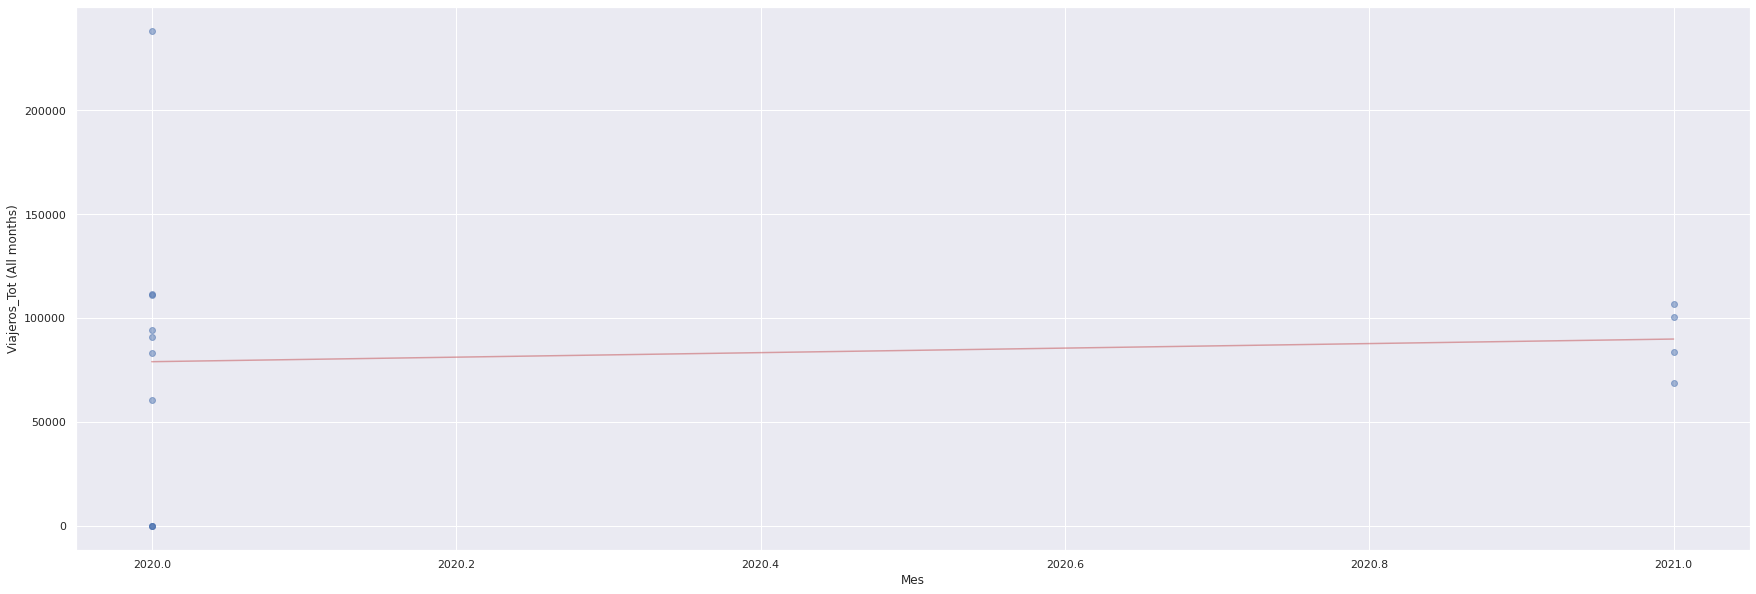

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Analysis for all months together.
x = DatasetPost[['Año']]
y = DatasetPost[['Viajeros_Tot']]
model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x)
plt.plot(x, y,'o', alpha=0.5)
plt.plot(x, y_hat, 'r', alpha=0.5)
plt.xlabel('Mes')
plt.ylabel('Viajeros_Tot (All months)')
print("MSE: {}".format(metrics.mean_squared_error(y_hat, y)))
print("EV: {}".format(metrics.explained_variance_score(y_hat, y)))
print("R^2: {}".format(metrics.r2_score(model.predict(x), y)))

In [ ]:
X=np.array([2021])
X = np.expand_dims(X, axis=1)
X.shape
y_hat = model.predict(X)
j=8 # August
print("Prediction of number of visitors for August : {}".format(y_hat))

Prediction of number of visitors for August : [[89862.75]]


## Multiple Linear Regression

### Without COVID-19 Data

The first step is to obtain a model for the non COVID-19 period.

Coefficient of Determination for Linear Regression Model: 0.9820385629675036
Coefficient of Determination for Polynomial (3rd order) Regression Model: 1.0


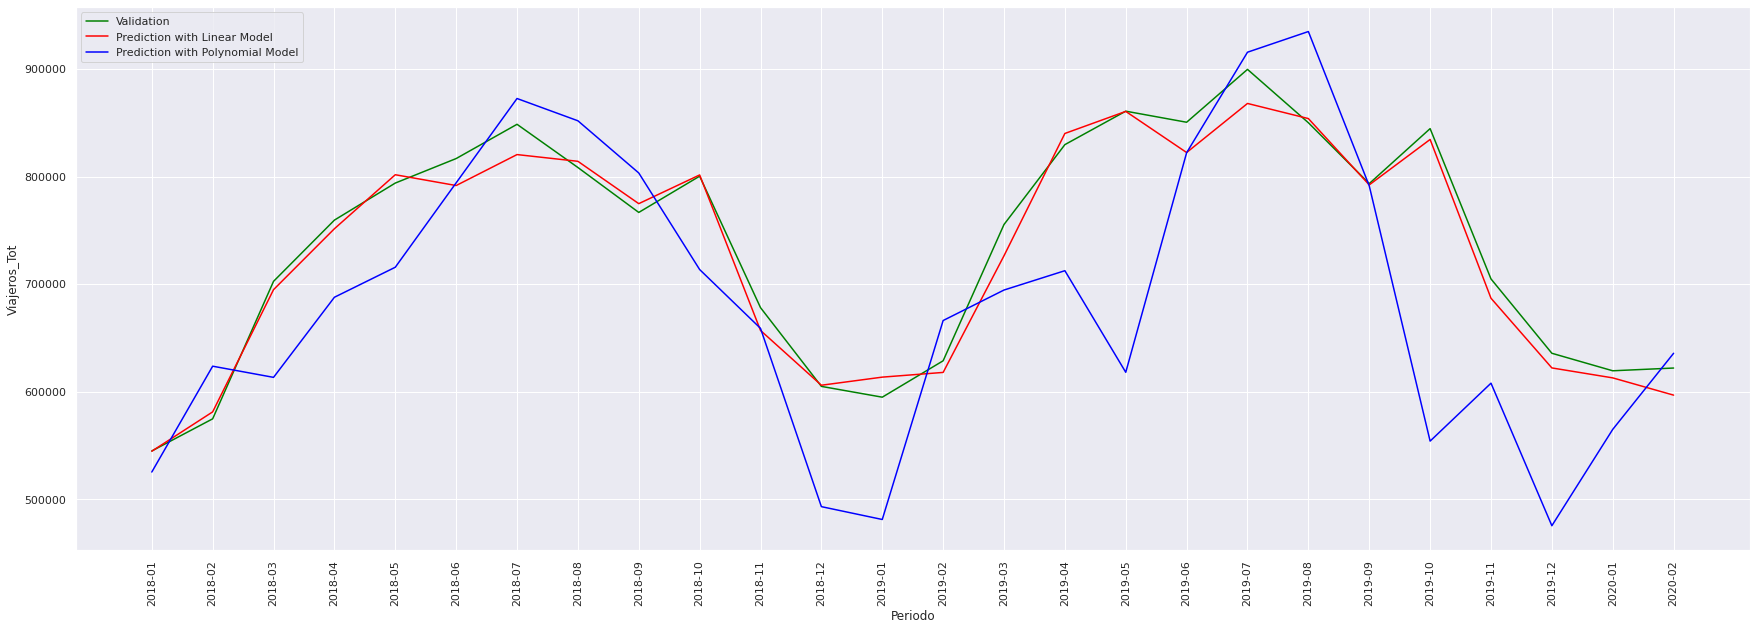

In [ ]:
#Linear Model 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#Training data 2015-2017
DatasetPRE_Training = Dataset[0:35]
DatasetPRE_Training.to_numpy()
#Validation data 2018-2019
DatasetPRE_Validation = Dataset[36:62]
DatasetPRE_Validation.to_numpy()

#Definion of the order for the polynomial regression, order 3
polynomial_features = PolynomialFeatures(degree=3)

#Training data
x = DatasetPRE_Training[['Aviones','Temperaturas','Pasajeros en avion','Viajeros_Extranjero','PERNOCT TOTAL','OCUPACION','CASOS_CONFIRMAT','VACUNATS_DOSI_1','VACUNATS_DOSI_2','PCR','TAR']]
x_poly = polynomial_features.fit_transform(x)
y = DatasetPRE_Training[['Viajeros_Tot']]

#Validation data
x_val = DatasetPRE_Validation[['Aviones','Temperaturas','Pasajeros en avion','Viajeros_Extranjero','PERNOCT TOTAL','OCUPACION','CASOS_CONFIRMAT','VACUNATS_DOSI_1','VACUNATS_DOSI_2','PCR','TAR']]
x_val_poly = polynomial_features.fit_transform(x_val)
y_val = DatasetPRE_Validation[['Viajeros_Tot']]
x_axis = DatasetPRE_Validation[['Periodo']]

#Regression models
model = LinearRegression(normalize=True,fit_intercept=False) #No intercept point is calculated
model_poly = LinearRegression(normalize=True)

#Fitting models
model.fit(x,y)
model_poly.fit(x_poly,y)

#Model errors
r_sq = model.score(x, y)
print('Coefficient of Determination for Linear Regression Model:', r_sq)
r_sq_poly = model_poly.score(x_poly, y)
print('Coefficient of Determination for Polynomial (3rd order) Regression Model:', r_sq_poly)

#Prediction
y_pred = model.predict(x_val)
y_pred_poly = model_poly.predict(x_val_poly)

#Results
fig, ax = plt.subplots()
ax.plot(y_val.to_numpy(), color = 'green', label = 'Validation')
ax.plot(y_pred, color = 'red', label = 'Prediction with Linear Model ')
ax.plot(y_pred_poly, color = 'blue', label = 'Prediction with Polynomial Model')
ax.legend(loc = 'upper left')
ax.set_xticks(np.linspace(0, 25, num=26))
ax.set_xticklabels(x_axis['Periodo'],rotation=90)
plt.xlabel('Periodo')
plt.ylabel('Viajeros_Tot')
plt.show()


As it can be observed in the previous plot, the linear prediction model, in red, is able to correctly track the number of visitors in teh city of Barcelona for the non COVID-19 period. Despite its coefficient of determination, the polynomial model tracks the number of visitors, but with a larger varince. Hence, we discard it in the following.

In fiting the model, we have considered also the COVID-19 parameters of the basis. But as the are all zero, the predicting model give a weight zero to them. The largest coefficients are given to **Temperatura** and **Ocupacion**


In [ ]:
#Coeffcients of the linear model
model.coef_

array([[ 1.54720185e+01, -3.47195859e+03, -6.29204135e-02,
         7.43117558e-01,  2.92089240e-02,  1.78583322e+03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])

Considering the previous model, we now try to see if visitors can be reliably prediucte through variables that do not have a component of turism. Wn consider now a model only based on **Temperatura**.

In [ ]:
#Training data
x_red = DatasetPRE_Training[['Temperaturas']]
#Validation data
x_val_red = DatasetPRE_Validation[['Temperaturas']]
#Regression model_red
model_red = LinearRegression(normalize=True)
#Fitting model
model_red.fit(x_red,y)
#Model error
r_sq_red = model_red.score(x_red, y)
print('Coefficient of Determination for Linear Regression Model with Reduced Dataset:', r_sq_red)
#Prediction
y_pred_red = model_red.predict(x_val_red)
#Results
fig, ax = plt.subplots()
ax.plot(y_val.to_numpy(), color = 'green', label = 'Validation')
ax.plot(y_pred, color = 'red', label = 'Prediction with Linear Model ')
ax.plot(y_pred_red, color = 'yellow', label = 'Prediction with Linel Model and Reduced Dataset')
ax.set_xticks(np.linspace(0, 25, num=26))
ax.set_xticklabels(x_axis['Periodo'],rotation=90)
ax.legend(loc = 'upper left')
plt.xlabel('Periodo')
plt.ylabel('Viajeros_Tot')
plt.show()

Coefficient of Determination for Linear Regression Model with Reduced Dataset: 0.70299553311629


As it can be observed in the previos results, the numbers of visitors is highly preditable through the **Temperatura** in no pandemic periods. Maybe, the slow yearly increase in tourism is lost, but maximums an minimums are clearly preducted.

### With only COVID-19 data

Whe considering only COVID-19 data, we propose the test of the following models:


*   Use of the non-COVID-19 linear model to see how it reacts with COVID-19 data (in Red)
* A linear model using COVID-19 data with the same variables as the previous model (in Blue)
*   A linear model in the COVID-19 period using only traveling related data (in magenta) 
*  A Linear model in the COVID-19 period using only COVID-19 data (in yellow)

In the following, we consider the extension of the COVID-19 database with the months of April, May and June (extrapolated). In this way, we are not dependent on travelers data and only rely on COVID-19 data. To predict the number of travelers in Barcelona we consider the Linear model in the COVID-19 period using only COVID-19 data   



In [ ]:
# Prediction with only COVID data
DatasetCOVID = Dataset[62:76]
DatasetCOVID.to_numpy()

# Non-COVID model with COVID data & COVID model with COVID data (Red Blue)
x_COVID = DatasetCOVID[['Aviones','Temperaturas','Pasajeros en avion','Viajeros_Extranjero','PERNOCT TOTAL','OCUPACION','CASOS_CONFIRMAT','VACUNATS_DOSI_1','VACUNATS_DOSI_2','PCR','TAR']]
y_COVID = DatasetCOVID[['Viajeros_Tot']]
x_axis = DatasetCOVID[['Periodo']]
y_pred_COVID = model.predict(x_COVID)
model_COVID = LinearRegression(normalize=True,fit_intercept=False) #No intercept point is calculated
model_COVID.fit(x_COVID,y_COVID)
y_pred_COVID2 = model_COVID.predict(x_COVID)

# Linear model in the COVID period using traveling related data (Magenta)
x_COVID_travel = DatasetCOVID[['Aviones','Temperaturas','Pasajeros en avion','Viajeros_Extranjero','PERNOCT TOTAL','OCUPACION']]
model_COVID_travel = LinearRegression(normalize=True,fit_intercept=False) #No intercept point is calculated
model_COVID_travel.fit(x_COVID_travel,y_COVID)
y_pred_COVID4 = model_COVID_travel.predict(x_COVID_travel)

# Linear model in the COVID period using only COVID data (Yellow)
x_COVID_notravel = DatasetCOVID[['CASOS_CONFIRMAT','VACUNATS_DOSI_1','VACUNATS_DOSI_2','PCR','TAR']]
model_COVID_notravel = LinearRegression(normalize=True) #No intercept point is calculated
model_COVID_notravel.fit(x_COVID_notravel,y_COVID)
y_pred_COVID3 = model_COVID_notravel.predict(x_COVID_notravel)
r_sq = model_COVID_notravel.score(x_COVID_notravel, y_COVID)
print('Coefficient of Determination for Linear model in the COVID period using only COVID data:', r_sq)

# Extension of the database with the May and June months plux scenario extention (Black)
x_COVID_notravel_extended = x_COVID_notravel.copy()
may = {'CASOS_CONFIRMAT':3319,'VACUNATS_DOSI_1':166060,'VACUNATS_DOSI_2':102254,'PCR':63580,'TAR':27083}
jun = {'CASOS_CONFIRMAT':2540,'VACUNATS_DOSI_1':154123,'VACUNATS_DOSI_2':193080,'PCR':48917,'TAR':23316}
# Projection based on a normal scenario
jul = {'CASOS_CONFIRMAT':2250,'VACUNATS_DOSI_1':160000,'VACUNATS_DOSI_2':200000,'PCR':45000,'TAR':20000}
ago = {'CASOS_CONFIRMAT':2000,'VACUNATS_DOSI_1':170000,'VACUNATS_DOSI_2':220000,'PCR':40000,'TAR':15000}
sep = {'CASOS_CONFIRMAT':1500,'VACUNATS_DOSI_1':180000,'VACUNATS_DOSI_2':240000,'PCR':35000,'TAR':10000}
x_COVID_notravel_extended = x_COVID_notravel_extended.append(may,ignore_index=True)
x_COVID_notravel_extended = x_COVID_notravel_extended.append(jun,ignore_index=True)
x_COVID_notravel_extended = x_COVID_notravel_extended.append(jul,ignore_index=True)
x_COVID_notravel_extended = x_COVID_notravel_extended.append(ago,ignore_index=True)
x_COVID_notravel_extended = x_COVID_notravel_extended.append(sep,ignore_index=True)
y_pred_COVID3_extended = model_COVID_notravel.predict(x_COVID_notravel_extended)

# Results
fig, ax = plt.subplots()
ax.plot(y_COVID.to_numpy(), 'g^-',markersize=12, label = 'Ground Truth')
ax.plot(y_pred_COVID, 'sr--',markersize=12, label = 'Non-COVID model with COVID data')
ax.plot(y_pred_COVID2, color = 'blue', label = 'COVID model with COVID data')
ax.plot(y_pred_COVID3, 'yo-',markersize=12, label = 'Linear model in the COVID period using only COVID data')
ax.plot(y_pred_COVID3_extended, color = 'black', label = 'Prediction of the Linear model in the COVID period using only COVID data')
ax.plot(y_pred_COVID4, color = 'magenta', label = 'Linear model in the COVID period using traveling related data')
ax.set_xticks(np.linspace(0, DatasetCOVID.shape[0]-1+5, num=DatasetCOVID.shape[0]+5))
ax.set_xticklabels(x_axis['Periodo'],rotation=90)
ax.legend(loc = 'upper left')
plt.xlabel('Periodo')
plt.ylabel('Viajeros_Tot')
plt.show()


Coefficient of Determination for Linear model in the COVID period using only COVID data: 0.4004872818831767


In [ ]:
model_COVID_notravel.coef_

array([[13.65207569, -0.62904714,  2.6772358 , -0.32656537, -0.61706056]])

As it can be observed, the non-COVID-19 linear model (in Red) predicts the numbers of tourists quite well, but because it depends in variables linked to Tourism. The COVID-19 models using COVID-19 data (in Blue and Magenta) predict exactly the number of tourists in the city ob Barcelona as they are trained with all the dataset.

Nevertheless, if we train a model only with COVID-19 data (in Yellow), this model does not perfectly extimate the number of tourists in the trained period. Nevertheless, this approach makes posible a prediction based only con COVID-19 data. If we extend this model to April, May and June (in Black) *it predicts a growth in the number of tourists.*

In order to proceed with this approach, we have observed that the level of estimation of the tourist for the summer 2021 depends on the training period considering samples fom the non-COVID period. In the following, we make all the trainings considering scenarios that range from the beginning of the database until the drop of tourist due to the lock-down in Spring 2020.

In [ ]:
fig, ax2 = plt.subplots()
ind_max = 67
travelers_COVID = np.zeros((76+5, ind_max))
travelers_COVID_ext = np.zeros((76+5, ind_max))

for ind in range(ind_max):
  DatasetCOVID = Dataset[ind:76]
  DatasetCOVID.to_numpy()
  
  # Linear model in the COVID period using only COVID data (Yellow)
  x_COVID_notravel = DatasetCOVID[['CASOS_CONFIRMAT','VACUNATS_DOSI_1','VACUNATS_DOSI_2','PCR','TAR']]
  y_COVID = DatasetCOVID[['Viajeros_Tot']] 

  model_COVID_notravel = LinearRegression(normalize=True) 
  model_COVID_notravel.fit(x_COVID_notravel,y_COVID)
  
  y_pred_COVID3 = model_COVID_notravel.predict(x_COVID_notravel)
      
  # Extension of the database with the May and June months plux scenario extention (Black)
  x_COVID_notravel_extended = x_COVID_notravel.copy()
  may = {'CASOS_CONFIRMAT':3319,'VACUNATS_DOSI_1':166060,'VACUNATS_DOSI_2':102254,'PCR':63580,'TAR':27083}
  jun = {'CASOS_CONFIRMAT':2540,'VACUNATS_DOSI_1':154123,'VACUNATS_DOSI_2':193080,'PCR':48917,'TAR':23316}
  # Projection based on a normal scenario
  jul = {'CASOS_CONFIRMAT':2250,'VACUNATS_DOSI_1':160000,'VACUNATS_DOSI_2':200000,'PCR':45000,'TAR':20000}
  ago = {'CASOS_CONFIRMAT':2000,'VACUNATS_DOSI_1':170000,'VACUNATS_DOSI_2':220000,'PCR':40000,'TAR':15000}
  sep = {'CASOS_CONFIRMAT':1500,'VACUNATS_DOSI_1':180000,'VACUNATS_DOSI_2':240000,'PCR':35000,'TAR':10000}
  x_COVID_notravel_extended = x_COVID_notravel_extended.append(may,ignore_index=True)
  x_COVID_notravel_extended = x_COVID_notravel_extended.append(jun,ignore_index=True)
  x_COVID_notravel_extended = x_COVID_notravel_extended.append(jul,ignore_index=True)
  x_COVID_notravel_extended = x_COVID_notravel_extended.append(ago,ignore_index=True)
  x_COVID_notravel_extended = x_COVID_notravel_extended.append(sep,ignore_index=True)
  y_pred_COVID3_extended = model_COVID_notravel.predict(x_COVID_notravel_extended)
  
  ax2.plot(range(ind,76), y_pred_COVID3, 'yo-',markersize=8)
  ax2.plot(range(ind,76+5),y_pred_COVID3_extended, color = 'black')

  if ind==0:
    x_axis = DatasetCOVID[['Periodo']]
    ax2.plot(range(ind,76),y_COVID.to_numpy(), 'g^-',markersize=12, label = 'Ground Truth')
    ax2.set_xticks(np.linspace(0, DatasetCOVID.shape[0]-1+5, num=DatasetCOVID.shape[0]+5))
    ax2.set_xticklabels(x_axis['Periodo'],rotation=90)

plt.xlabel('Periodo')
plt.ylabel('Viajeros_Tot')
plt.show()

As it can be observed, the level of prediction in the number of tourists for the summer 2021 in the city of Barcelona, depending on the length of the training for tnen non-COVId period ranges 2e5 to 1e5. A mean, and reasonable value would be in the order of 5e5 to 6e5. 

The interpretation of the model is that in order to predict the increase in the number of tourists in summer 2021, the model needs to be trained considering the drop due to the lock-down in spring 2020. The increase in the summer 2021 is essentially based on the vaccination. It is "curious" to observe that the model predicts an increase in the number of tourists with a training that had no increase.

## Random Forest



In [ ]:
df=pd.read_excel(r"/content/drive/MyDrive/Datos Capstone Project/Dataset.xlsx", 
                 engine='openpyxl', parse_dates=['Periodo'], index_col='Periodo')

In [ ]:
# Move "Viajeros_Tot" to end of dataframe
col_names=list(df.columns)

def reorder_columns(columns, first_cols=[], last_cols=[], drop_cols=[]):
    columns = list(set(columns) - set(first_cols))
    columns = list(set(columns) - set(drop_cols))
    columns = list(set(columns) - set(last_cols))
    new_order = first_cols + columns + last_cols
    return new_order

reordered_cols = reorder_columns(col_names, last_cols=['Viajeros_Tot'])
df=df[reordered_cols]

In [ ]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = pd.concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

### Without COVID-19 Data

Forecast number of visitors in Barcelona:
- Trianing set: 2015-2017 (36 observations)
- Test set: 2018-2019 (24 observations)

For this model, we decided to use as input the values of the past two months of each independent variable. This means that we end up only using 58 observations. We lose the first two obsevations because we cannot predict the value of Y in 2015-01 since we do not have its pasts values in 2014-12 nor in 2014-11, they are unknown.
Therefore, our trainig set starts in 2015-03. For example, to predict the value of Y in 2015-03, we need as input its value in 2015-02 and 2015-01. To predict the value of Y in 2019-12, the model will use as input its value in 2019-11 and 2019-10. 

In [ ]:
# Drop rows referring to 2020-2021

df1=df[:-16]

In [ ]:
# Drop columns/fetaures related to covid

df1=df1.drop(['CASOS_CONFIRMAT', 'VACUNATS_DOSI_1', 'VACUNATS_DOSI_2', 'PCR', 'TAR', 'HOTELES ABIERTOS', 'APARTAMENTOS DISPONIBLES'], axis=1)
    
df1.head()

FACTURACION 2  ...  Viajeros_Tot
Periodo                    ...              
2015-01-01          50.36  ...        430539
2015-02-01          53.95  ...        475019
2015-03-01          68.80  ...        589585
2015-04-01          60.70  ...        688490
2015-05-01          63.98  ...        751468

[5 rows x 32 columns]

In [ ]:
# Multivariate + one step forecasting
# using past observations to forecast one future observation

# use past 2 months of each variable to forecast next future observation of Yt

datos=series_to_supervised(df1.values, n_in=2)

predictions = list()

# split dataset
steps = 24#predict 2018-2019
datos_train = datos[:-steps]
datos_test  = datos[-steps:]

In [ ]:
# seed history with training dataset
history = [x for x in datos_train]

# step over each time-step in the test set
for i in range(len(datos_test)):
    # split test row into input and output columns
    testX, testy = datos_test[i, :-1], datos_test[i, -1]
    
    # fit model on history and make a prediction
    train = np.array(history)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = RandomForestRegressor(n_estimators=1000, max_depth=100)
    model.fit(trainX, trainy)
    
    # make a one-step prediction
    yhat = model.predict([testX])

    # store forecast in list of predictions
    predictions.append(yhat[0])
    
    # add actual observation to history for the next loop
    history.append(datos_test[i])
    
    # summarize progress
    print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    
# estimate prediction error
mae = mean_absolute_error(datos_test[:, -1], predictions)
print('Mean Absolute Error: %.3f' % mae)  

>expected=544795.0, predicted=531948.2
>expected=574681.0, predicted=558951.2
>expected=702521.0, predicted=655053.6
>expected=759453.0, predicted=741784.9
>expected=793903.0, predicted=762037.8
>expected=816689.0, predicted=794662.3
>expected=848546.0, predicted=810265.4
>expected=808370.0, predicted=820125.5
>expected=766597.0, predicted=773483.2
>expected=800314.0, predicted=787208.8
>expected=678054.0, predicted=650864.2
>expected=604840.0, predicted=612931.6
>expected=594803.0, predicted=590752.0
>expected=628643.0, predicted=599917.9
>expected=755384.0, predicted=744325.5
>expected=829641.0, predicted=806694.8
>expected=860744.0, predicted=818563.1
>expected=850450.0, predicted=836528.3
>expected=899614.0, predicted=843120.6
>expected=849994.0, predicted=864770.1
>expected=793388.0, predicted=849325.5
>expected=844523.0, predicted=832841.1
>expected=704761.0, predicted=671043.8
>expected=635635.0, predicted=620916.2
Mean Absolute Error: 23463.390


The R-squared value is 0.93, which means that our model did quite a good job. Approximately 92% of the observed variation in our dependent variable is explained by the model's inputs.

In [ ]:
# plot expected vs predicted
y=datos_test[:, -1]#values for Yt, it's the set of testy's
yhat=predictions

# R-squared scores
r2 = r2_score(y, predictions)
print('R-squared scores:', round(r2, 2))

plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

R-squared scores: 0.93


### With COVID-19 Data

Forecast number of visitors in Barcelona:
- Trianing set: 2015-2019 (60 observations)
- Test set: 2020-2021 (16 observations)

For this case, we believe that it is more appropiate to only use as input the value of a feature in the past month. Now, we only lose one observation from the total 66 observations. Again, to predict the value of Y in 2015-02, we need as input its value in 2015-01. To predict the value of Y in 2021-04, the model will use as input its value in 2021-03. 

In [ ]:
# Check if rows for 2020-2021 are not missing

df[-16:]

FACTURACION 2  ESTANCIA APARTAMENTOS  ...     PCR  Viajeros_Tot
Periodo                                           ...                      
2020-01-01          62.71                   3.51  ...       0        619351
2020-02-01          65.74                   3.19  ...       0        621908
2020-03-01          57.48                   3.25  ...   12468        238053
2020-04-01           0.00                   0.00  ...   26185             0
2020-05-01           0.00                   0.00  ...   31458             0
2020-06-01           0.00                   0.00  ...   23289             0
2020-07-01          61.45                   3.64  ...   45398        110872
2020-08-01          64.72                   3.57  ...   54462        111626
2020-09-01          54.78                   5.54  ...   70837         94434
2020-10-01          51.88                   4.77  ...  121939         83061
2020-11-01          48.29                   6.45  ...   70876         60732
2020-12-01          51.64                  11.00  ...   74557         90739
2021-01-01          52.05                   8.50  ...  112890         68844
2021-02-01          48.21                   8.27  ...   79874         83523
2021-03-01          51.24                   8.90  ...   78307        100392
2021-04-01          50.68                  10.03  ...   78200        106692

[16 rows x 39 columns]

In [ ]:
df2=df.drop(['HOTELES ABIERTOS', 'APARTAMENTOS DISPONIBLES'], axis=1)

In [ ]:
# Multivariate + one step forecasting
# using past observations to forecast one future observation

# use past month to forecast next future observation

datos1=series_to_supervised(df2.values)

predictions1 = list()

# split dataset
steps1 = 16#predict 2020-2021
datos_train1 = datos1[:-steps1]
datos_test1  = datos1[-steps1:]

In [ ]:
# seed history with training dataset
history1 = [x for x in datos_train1]

# step over each time-step in the test set
for i in range(len(datos_test1)):
    # split test row into input and output columns
    testX1, testy1 = datos_test1[i, :-1], datos_test1[i, -1]
    
    # fit model on history and make a prediction
    train1 = np.array(history1)
    trainX1, trainy1 = train1[:, :-1], train1[:, -1]
    model1 = RandomForestRegressor(n_estimators=1000, max_depth=100)
    model1.fit(trainX1, trainy1)
    
    # make a one-step prediction
    yhat1 = model1.predict([testX1])

    # store forecast in list of predictions
    predictions1.append(yhat1[0])
    
    # add actual observation to history for the next loop
    history1.append(datos_test1[i])
    
    # summarize progress
    print('>expected=%.1f, predicted=%.1f' % (testy1, yhat1))
    
# estimate prediction error
mae1 = mean_absolute_error(datos_test1[:, -1], predictions1)
print('MAE: %.3f' % mae1)  

>expected=619351.0, predicted=615136.5
>expected=621908.0, predicted=609587.9
>expected=238053.0, predicted=516083.1
>expected=0.0, predicted=370270.0
>expected=0.0, predicted=159485.0
>expected=0.0, predicted=82143.2
>expected=110872.0, predicted=134265.7
>expected=111626.0, predicted=143792.7
>expected=94434.0, predicted=128390.2
>expected=83061.0, predicted=95969.7
>expected=60732.0, predicted=79951.5
>expected=90739.0, predicted=81200.7
>expected=68844.0, predicted=82077.1
>expected=83523.0, predicted=79619.9
>expected=100392.0, predicted=89570.9
>expected=106692.0, predicted=101265.0
MAE: 66939.383


Now, the R-squared value is 0.55, which means that our model's inputs could only, approximately, explain 55% of the observed variation in our dependent variable.

R-squared scores: 0.55


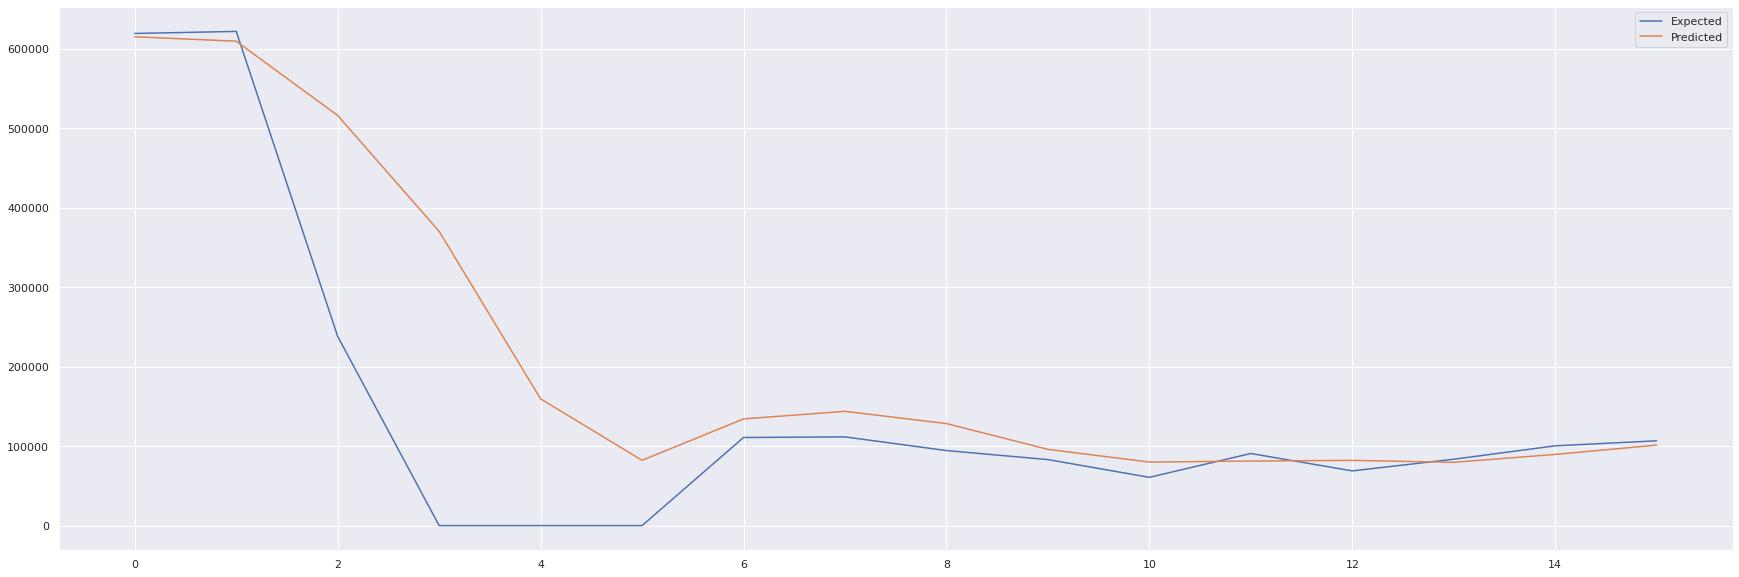

In [ ]:
# plot expected vs predicted
y1=datos_test1[:, -1]#values for Yt, it's the set of testy's
yhat1=predictions1

# R-squared scores
r2_1 = r2_score(y1, predictions1)
print('R-squared scores:', round(r2_1, 2))

plt.plot(y1, label='Expected')
plt.plot(yhat1, label='Predicted')
plt.legend()
plt.show()

## SARIMA

Seasonal Autoregressive Integrated Moving Average, or SARIMA, is one of the most widely used forecasting methods for univariate time series data forecasting.
It's an extension from ARIMA model that supports the direct modeling of the seasonal component.


### Introduction and data preparation

In [ ]:
#SARIMA Model instalation
!pip install pmdarima
!pip3 uninstall statsmodels
!pip3 install numpy scipy patsy pandas
!pip3 install statsmodels

import pmdarima as pm #SARIMA model, if its not found, execute the 4 above instalations

In [ ]:
DatasetSAR = Dataset
DatasetSAR['Periodo'] = Dataset['Periodo'].apply(lambda x:  re.sub("[^0-9]", "", x))  #Modify YYYY-MM to YYYYMM

DatasetSAR.describe()
DatasetSAR.dtypes
DatasetSAR = Dataset.astype(int) #Convert to integers to apply the model
DatasetSAR.sort_values('Periodo',inplace=True) #Sorting
DatasetSAR.dtypes
DatasetSAR.reset_index(drop=True)

In [ ]:
#Convert integer to dates
DatasetSAR['dates'] = pd.to_datetime(DatasetSAR['Periodo'], format='%Y%m') 

#Use the variable of total tourist and dates
df = DatasetSAR[['dates','Viajeros_Tot']] 

In [ ]:
df.sort_values("dates", inplace=True)
df = df.reset_index(drop=True)

#We save the file in csv to parse dates and indexing
df.to_csv("/content/drive/MyDrive/Datos Capstone Project/df.csv") 

df.head()

###  Without COVID-19 Data

We will do a first analysis of the SARIMA model without the COVID-19 pandemic to better understand this model and to fit a first predictor.

As we know there is a seasonal component in the tourist time series, so we will do an usual differencing and a seasonal differencing and see the differences.

In [ ]:
# Import
data = pd.read_csv('/content/drive/MyDrive/Datos Capstone Project/df.csv', parse_dates=['dates'], index_col='dates')

#We only take the firsts 60 months
data = data.head(60)

# Plot
fig, axes = plt.subplots(2, 1, figsize=(20,10), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Turistas en Barcelona', fontsize=16)
plt.show()

The auto-ARIMA process seeks to identify the most optimal parameters for an ARIMA model, settling on a single fitted ARIMA model.

Auto-ARIMA works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges. If the seasonal optional is enabled, auto-ARIMA also seeks to identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

In resume: auto_Arima automatically discover the optimal order for an ARIMA model.

In [ ]:
smodel = pm.auto_arima(data.Viajeros_Tot, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

-------------
We do a first forecast without COVID-19 data and see how the arima model works:


In [ ]:
# Forecast
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Tourist in Barcelona")
plt.show()

It looks like the tendency and stationality is well represented in this prediction

### With COVID-19 Data

We do the same analysis including the periods of the pandemic and see how it works.

In [ ]:
# Import
data = pd.read_csv('/content/drive/MyDrive/Datos Capstone Project/df.csv', parse_dates=['dates'], index_col='dates')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(20,10), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Aviones', fontsize=16)
plt.show()

In [ ]:
smodel = pm.auto_arima(data.Viajeros_Tot, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

In [ ]:
# Forecast
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Tourist")
plt.show()

### With only COVID-19 Data

Finally, we do the same analysis with only the periods of the pandemic and see how it works despite of the lack of data (only 13 months).

In [ ]:
# Import
data = pd.read_csv('/content/drive/MyDrive/Datos Capstone Project/df.csv', parse_dates=['dates'], index_col='dates').tail(13)

# Plot
fig, axes = plt.subplots(2, 1, figsize=(20,10), dpi=100, sharex=True)


# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Tourist in Barcelona', fontsize=16)
plt.show()

In [ ]:
# Here we use the same model but without seasonality (because of the lack of data)

smodel = pm.auto_arima(data.Viajeros_Tot, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

In [ ]:
# Forecast
n_periods = 5
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Tourist")
plt.show()

As we can see, also the ARIMA models are not embedded within any underlying structural relationships. As we only see how the only variable beheves during time.
ARIMA models are essentially ‘backward looking’ models. As such, they are generally poor at predicting turning points, unless the turning point represents a return to a long-run equilibrium (as we can clearly see in the model with COVID-19 Data).

# Prediction

Despite we have analized and already prediicted values in the models section, in this section we will emphasize on the multivariate models (Multiple linear regression and Random Forest) and try to make a final prediction.

## Random Forest

We forecast the values of "Viajeros_Tot" for years 2020 and 2021 (16 observations) with the random forest model trained without COVID-19 data, since it obtained a very high R-squared score (0.93).

This model used as input the values of the features in the past two months, we can only forecast "Viajeros_Tot" from 2020-03 to 2021-04.

In [ ]:
df=pd.read_excel(r"/content/drive/MyDrive/Datos Capstone Project/Dataset.xlsx", 
                 engine='openpyxl', parse_dates=['Periodo'], index_col='Periodo')

In [ ]:
# drop same features as in trained model

datos_predict=df.drop(['CASOS_CONFIRMAT', 'VACUNATS_DOSI_1', 'VACUNATS_DOSI_2', 'PCR', 'TAR', 'HOTELES ABIERTOS', 'APARTAMENTOS DISPONIBLES'], axis=1)

In [ ]:
# keep only rows referring to 2020-2021
datos_predict1=datos_predict[-16:]

In [ ]:
# Move "Viajeros_Tot" to end of dataframe
col_names=list(datos_predict1.columns)

reordered_cols = reorder_columns(col_names, last_cols=['Viajeros_Tot'])
datos_predict1=datos_predict1[reordered_cols]

In [ ]:
# reshape data into a machine learning matrix
datos_pred=series_to_supervised(datos_predict1.values, n_in=2)

In [ ]:
# Predict 2020-03 to 2021-04 with model trained without covid19 data

predictions_covid19 = list()

# step over each time-step in the predict set
for i in range(len(datos_pred)):
    # split test row into input and output columns
    predX = datos_pred[i,:-1]    
    
    # make a one-step prediction
    yhat1 = model.predict([predX])

    # store forecast in list of predictions
    predictions_covid19.append(yhat1[0])
    
    # summarize progress
    print('predicted=%.1f' % (yhat1))  

predicted=520766.2
predicted=511142.2
predicted=507281.0
predicted=506192.0
predicted=510866.8
predicted=518177.1
predicted=512899.3
predicted=507753.7
predicted=507351.3
predicted=505887.0
predicted=506097.0
predicted=507488.3
predicted=507198.1
predicted=507914.0


In [ ]:
# Save predictions and expected in a dataframe

df=pd.read_excel(r"/content/drive/MyDrive/Datos Capstone Project/Dataset.xlsx", engine='openpyxl')
years=list(df['Periodo'][-14:])#2020-03 to 2021-04

# Create df from expected values
vals=df['Viajeros_Tot'][-14:]
vals=np.array(vals)
df_real=pd.DataFrame(vals, columns=['Expected']) 
df_real['Period']=years

# Create df from predictions for 2020-2021 with model without covid19 data 
df_prednocovid=pd.DataFrame(predictions_covid19, columns=['Predictions_Model_No_Covid']) 
df_prednocovid['Period']=years

# Create df for predictions for 2020-2021 with model with covid19 data 
df_predcovid=pd.DataFrame(predictions1[2:], columns=['Predictions_Model_Covid']) 
df_predcovid['Period']=years

In [ ]:
# Merge three dataframes
df_results = df_real.merge(df_prednocovid, how='left', on=['Period'])
df_results = df_results.merge(df_predcovid, how='left', on=['Period'])
df_results1=df_results.set_index(['Period'])

The model trained without COVID-19 data predicts very poorly the values of "Viajeros_Tot". Moreover, the prediction power of the model trained with COVID-19 data does not perform as good as we expected. Perhaps it is due to the lack of more variables related to COVID-19 or to the large number of missing values around COVID-19 variables.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

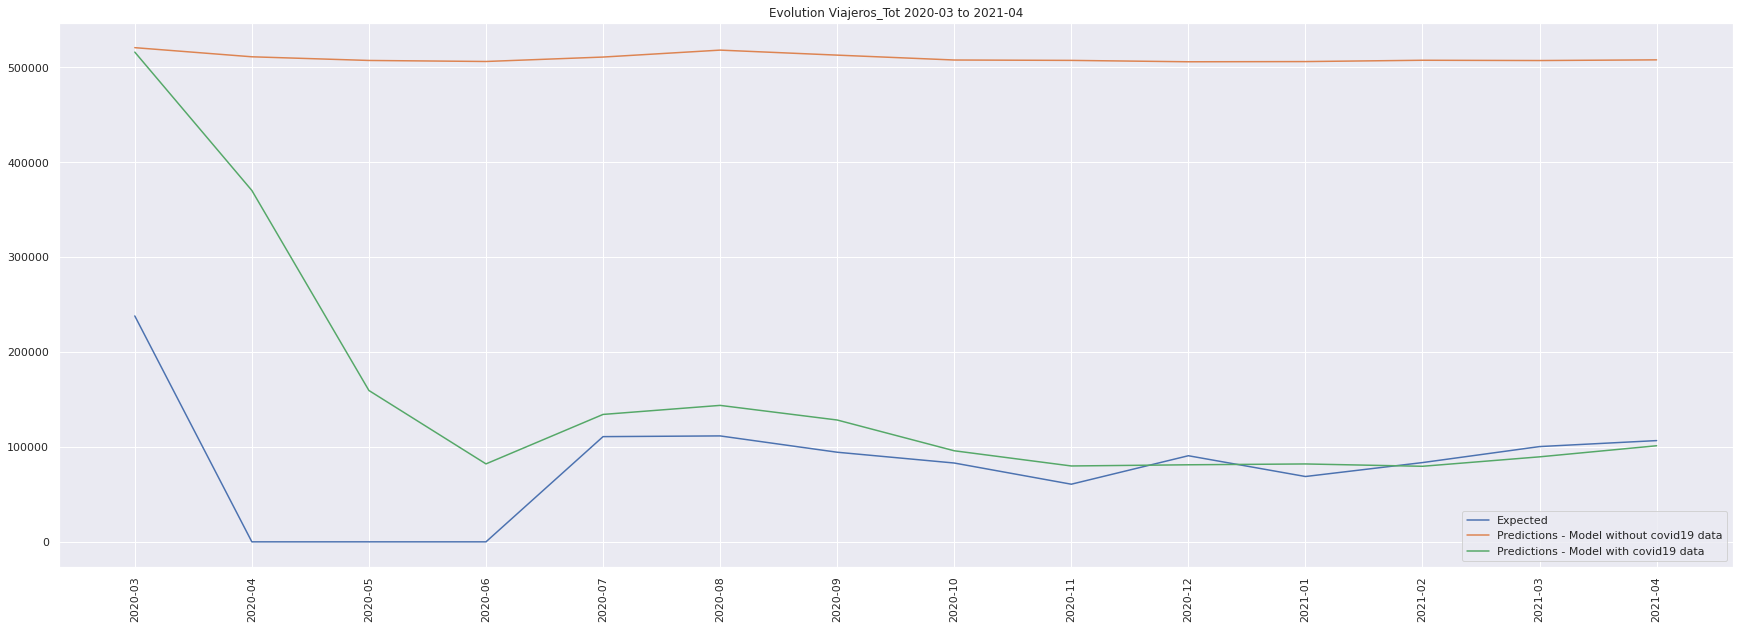

In [ ]:
plt.plot(df_results1.Expected, label='Expected')
plt.plot(df_results1.Predictions_Model_No_Covid, label='Predictions - Model without covid19 data')
plt.plot(df_results1.Predictions_Model_Covid, label='Predictions - Model with covid19 data')
plt.title('Evolution Viajeros_Tot 2020-03 to 2021-04')
plt.legend()
plt.xticks(rotation = 'vertical')

## Multiple Linear Regression

In order to proceed with a prediction based on the Multiple Regression Model, we have observed that the level of estimation of the tourist for the summer 2021 depends on the training period considering samples fom the non-COVID period. In the following, we make all the trainings considering scenarios that range from the beginning of the database until the drop of tourist due to the lock-down in Spring 2020.

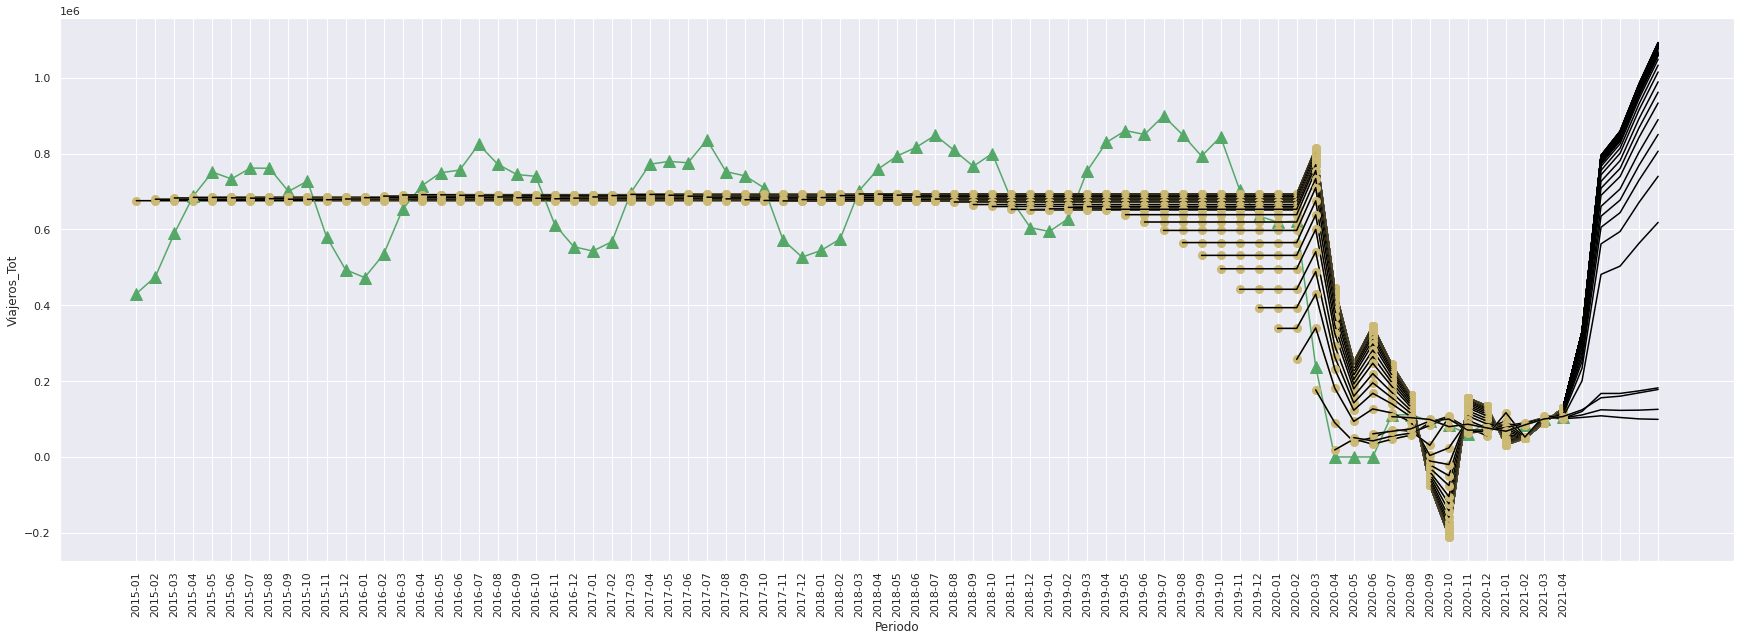

In [ ]:
fig, ax2 = plt.subplots()
ind_max = 67
travelers_COVID = np.zeros((76+5, ind_max))
travelers_COVID_ext = np.zeros((76+5, ind_max))

for ind in range(ind_max):
  DatasetCOVID = Dataset[ind:76]
  DatasetCOVID.to_numpy()
  
  # Linear model in the COVID period using only COVID data (Yellow)
  x_COVID_notravel = DatasetCOVID[['CASOS_CONFIRMAT','VACUNATS_DOSI_1','VACUNATS_DOSI_2','PCR','TAR']]
  y_COVID = DatasetCOVID[['Viajeros_Tot']] 

  model_COVID_notravel = LinearRegression(normalize=True) 
  model_COVID_notravel.fit(x_COVID_notravel,y_COVID)
  
  y_pred_COVID3 = model_COVID_notravel.predict(x_COVID_notravel)
      
  # Extension of the database with the May and June months plux scenario extention (Black)
  x_COVID_notravel_extended = x_COVID_notravel.copy()
  may = {'CASOS_CONFIRMAT':3319,'VACUNATS_DOSI_1':166060,'VACUNATS_DOSI_2':102254,'PCR':63580,'TAR':27083}
  jun = {'CASOS_CONFIRMAT':2540,'VACUNATS_DOSI_1':154123,'VACUNATS_DOSI_2':193080,'PCR':48917,'TAR':23316}
  # Projection based on a normal scenario
  jul = {'CASOS_CONFIRMAT':2250,'VACUNATS_DOSI_1':160000,'VACUNATS_DOSI_2':200000,'PCR':45000,'TAR':20000}
  ago = {'CASOS_CONFIRMAT':2000,'VACUNATS_DOSI_1':170000,'VACUNATS_DOSI_2':220000,'PCR':40000,'TAR':15000}
  sep = {'CASOS_CONFIRMAT':1500,'VACUNATS_DOSI_1':180000,'VACUNATS_DOSI_2':240000,'PCR':35000,'TAR':10000}
  x_COVID_notravel_extended = x_COVID_notravel_extended.append(may,ignore_index=True)
  x_COVID_notravel_extended = x_COVID_notravel_extended.append(jun,ignore_index=True)
  x_COVID_notravel_extended = x_COVID_notravel_extended.append(jul,ignore_index=True)
  x_COVID_notravel_extended = x_COVID_notravel_extended.append(ago,ignore_index=True)
  x_COVID_notravel_extended = x_COVID_notravel_extended.append(sep,ignore_index=True)
  y_pred_COVID3_extended = model_COVID_notravel.predict(x_COVID_notravel_extended)
  
  ax2.plot(range(ind,76), y_pred_COVID3, 'yo-',markersize=8)
  ax2.plot(range(ind,76+5),y_pred_COVID3_extended, color = 'black')

  if ind==0:
    x_axis = DatasetCOVID[['Periodo']]
    ax2.plot(range(ind,76),y_COVID.to_numpy(), 'g^-',markersize=12, label = 'Ground Truth')
    ax2.set_xticks(np.linspace(0, DatasetCOVID.shape[0]-1+5, num=DatasetCOVID.shape[0]+5))
    ax2.set_xticklabels(x_axis['Periodo'],rotation=90)

plt.xlabel('Periodo')
plt.ylabel('Viajeros_Tot')
plt.show()

As it can be observed, the level of prediction in the number of tourists for the summer 2021 in the city of Barcelona, depending on the length of the training for tnen non-COVId period ranges 2e5 to 1e5. A mean, and reasonable value would be in the order of 5e5 to 6e5.

The interpretation of the model is that in order to predict the increase in the number of tourists in summer 2021, the model needs to be trained considering the drop due to the lock-down in spring 2020. The increase in the summer 2021 is essentially based on the vaccination. It is "curious" to observe that the model predicts an increase in the number of tourists with a training that had no increase.